### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points
- how useful are remuneration and spending scores data
- can social data (e.g. customer reviews) be used in marketing campaigns
- what is the impact on sales per product
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales.

# Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file(s) as reviews.

data = pd.read_csv('turtle_reviews.csv')
# View the DataFrame.

print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [4]:
# Any missing values?
# We can run the below code to fill NA values.

data.fillna(0, inplace=True)

# We should also run the below code to drop duplicate entires.

data = data.drop_duplicates()

In [7]:
# Descriptive statistics.
data.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [8]:
# Drop unnecessary columns. 
# The column names are quirky, so I recommend running the below code to print them as they are, then copying and pasting
# the names into the lines below.
print(data.columns)


data = data[['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points']]

# View column names.
print(data.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
Index(['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points'], dtype='object')


## 3. Rename columns

In [9]:
# Rename the column headers.
# Keep 'age' as it is.

data = data.rename(columns={'remuneration (k£)': 'rem', 'spending_score (1-100)': 'spend_score', 'loyalty_points': 'lp'})


# View column names.
print(data.columns)

# Will just view the first 20 rows to make sure it looks coherent too.
data.head(20)

Index(['age', 'rem', 'spend_score', 'lp'], dtype='object')


age    rem  spend_score    lp
0    18  12.30           39   210
1    23  12.30           81   524
2    22  13.12            6    40
3    25  13.12           77   562
4    33  13.94           40   366
5    24  13.94           76   573
6    37  14.76            6    61
7    25  14.76           94   772
8    66  15.58            3    31
9    32  15.58           72   724
10   69  15.58           14   138
11   37  15.58           99  1067
12   57  16.40           15   179
13   26  16.40           77   721
14   39  16.40           13   150
15   24  16.40           79   701
16   37  17.22           35   417
17   22  17.22           66   579
18   51  18.86           29   406
19   37  18.86           98  1278

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
data.to_csv('turtle_reviews_clean.csv', index=False)

In [11]:
# Import new CSV file with Pandas. (lpars - Loyalty Points Age Rem Spend)

lpars = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
lpars.head()

age    rem  spend_score   lp
0   18  12.30           39  210
1   23  12.30           81  524
2   22  13.12            6   40
3   25  13.12           77  562
4   33  13.94           40  366

## 5. Linear regression

### 5a) spending vs loyalty

In [12]:
# Independent variable.
y = lpars['lp']

# Dependent variable.
x = lpars['spend_score']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = lpars).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          2.92e-263
Time:                        23:07:36   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * lpars['spend_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spend_score, Length: 2000, dtype: float64

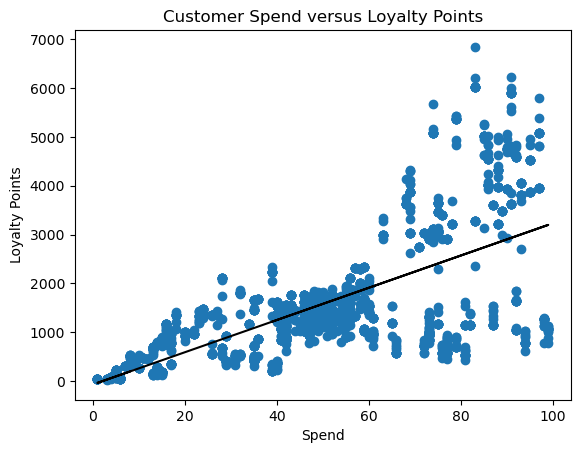

In [15]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')
plt.title("Customer Spend versus Loyalty Points")
plt.xlabel("Spend")
plt.ylabel("Loyalty Points")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [16]:
# Independent variable.
y2 = lpars['lp']

# Dependent variable.
x2 = lpars['rem']

# OLS model and summary.
f = 'y2 ~ x2'
test2 = ols(f, data = lpars).fit()

# Print the regression table.
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          2.43e-209
Time:                        23:07:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the the X coefficient and the constant to generate the regression table.
y2_pred = (-65.686513) + 34.187825 * lpars['rem']

# View the output.
y2_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: rem, Length: 2000, dtype: float64

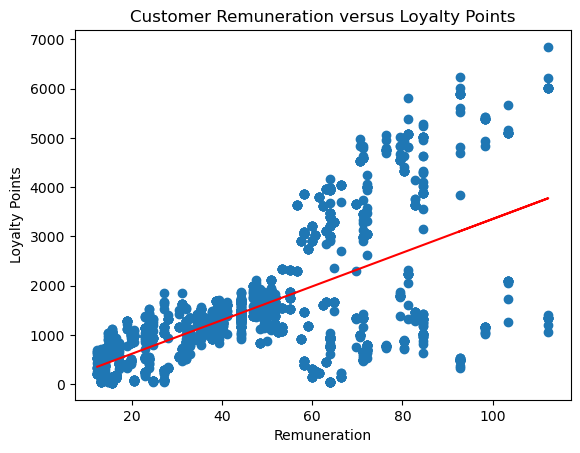

In [19]:
# Plot graph with regression line.
plt.scatter(x2, y2)

# Plot the regression line (in red).
plt.plot(x2, y2_pred, color='red')
plt.title("Customer Remuneration versus Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [20]:
# Independent variable.
y3 = lpars['lp']

# Dependent variable.
x3 = lpars['age']

# OLS model and summary.
f = 'y3 ~ x3'
test3 = ols(f, data = lpars).fit()

# Print the regression table.
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 02 Mar 2024   Prob (F-statistic):             0.0577
Time:                        23:07:48   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y3_pred = (1736.517739) + -4.012805 * lpars['age']

# View the output.
y3_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

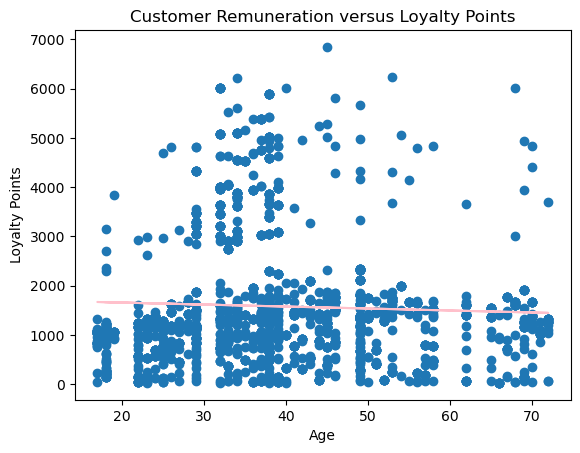

In [23]:
# Plot graph with regression line.
plt.scatter(x3, y3)

# Plot the regression line (in pink).
plt.plot(x3, y3_pred, color='pink')
plt.title("Customer Remuneration versus Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

There is clearly a fork in the road in the experience of most customers where they are encouraged to become further engagers. This process is independent of age.

# 

# Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. 

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.head()

age    rem  spend_score   lp
0   18  12.30           39  210
1   23  12.30           81  524
2   22  13.12            6   40
3   25  13.12           77  562
4   33  13.94           40  366

In [26]:
# Drop unnecessary columns.
# We are looking to model remuneration and spend.
df2 = df2.drop(columns=['age', 'lp'])

# View DataFrame.
df2.head()

rem  spend_score
0  12.30           39
1  12.30           81
2  13.12            6
3  13.12           77
4  13.94           40

In [27]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rem          2000 non-null   float64
 1   spend_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [28]:
# Descriptive statistics.
df2.describe()

rem  spend_score
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000

## 2. Plot

<Axes: xlabel='rem', ylabel='spend_score'>

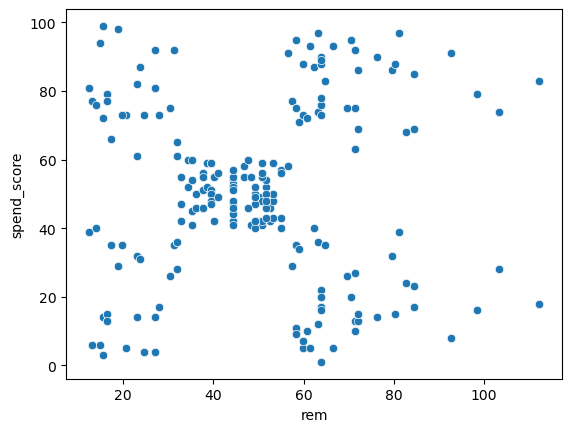

In [29]:
# Create a scatterplot with Seaborn.
# For the purposes of this plot, I will assume a relationship exists between remuneration and spend score
# such that remuneration can be regarded as the independent and spend the dependent variable.

sns.scatterplot(x='rem',
               y = 'spend_score',
               data = df2)

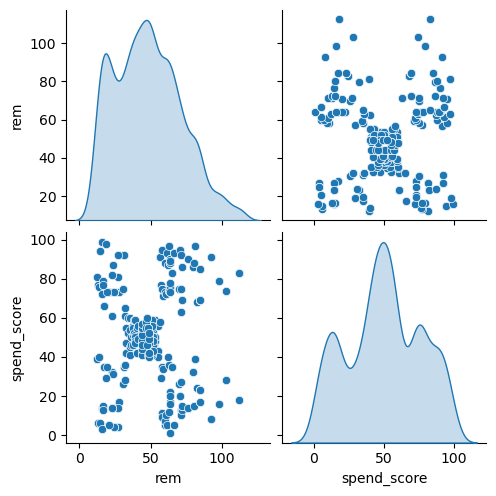

In [30]:
# Create a pairplot with Seaborn.
x = df2[['rem', 'spend_score']]

sns.pairplot(df2, 
            vars = x,
            diag_kind='kde')

Worth noting at this stage that some clustering is evident. We can see grouping in the scatterplot, which crudely remebles the shape of the five face of a die. The distribution profile of spend score more clearly indicates three clusters, compared to the rem distribution. 

## 3. Elbow and silhoutte methods

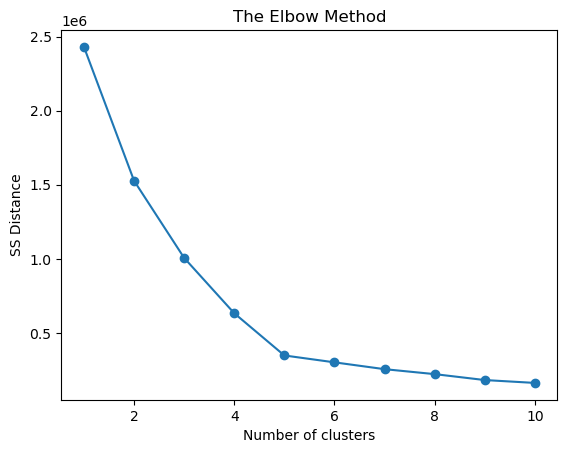

In [31]:
# Determine the number of clusters: Elbow method.

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(df2)                  # We can use 'df2' or 'x' here as they are the same thing.
    ss.append(kmeans.inertia_)
    
# Plot the elbow method.
plt.plot(range(1, 11),
        ss,
        marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS Distance")

plt.show()

Text(0, 0.5, 'Sil')

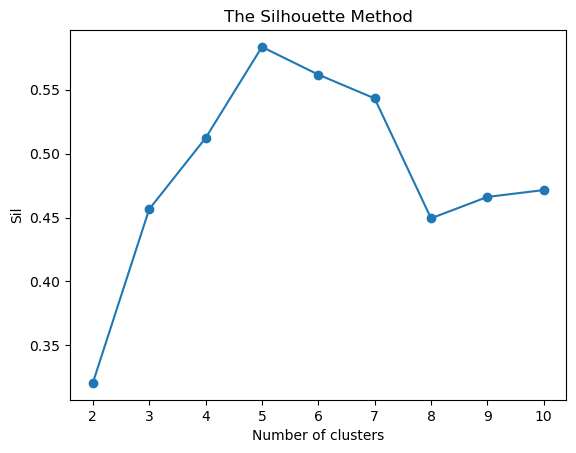

In [32]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,                    # Again 'df2' or 'x'.
                               labels,
                               metric='euclidean'))
    
# Plotting the silhouette method.
plt.plot(range(2, kmax+1),
        sil,
        marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

## 4. Evaluate k-means model at different values of *k*

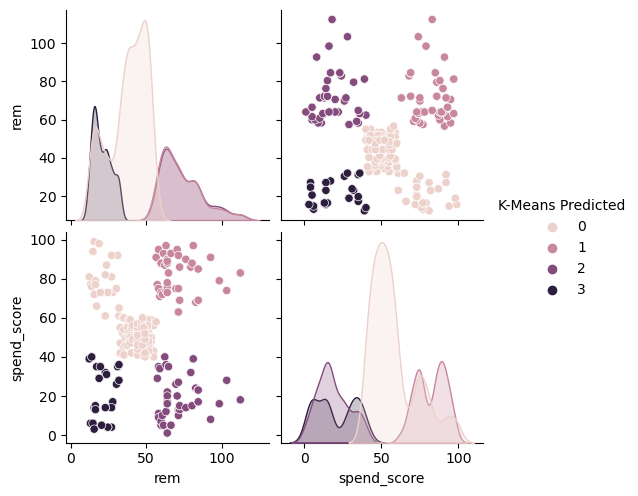

In [33]:
# Five would appear to be the ideal number, so let's evaluate between 4 and 6 clusters.
# Use four clusters.

kmeans = KMeans(n_clusters=4,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

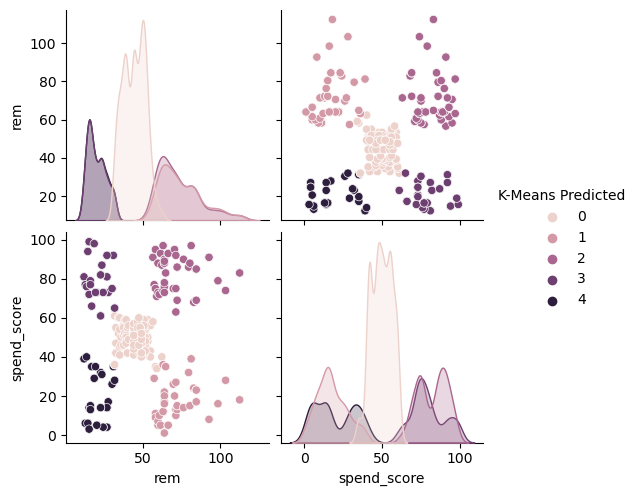

In [34]:
# Use five clusters.

kmeans = KMeans(n_clusters=5,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

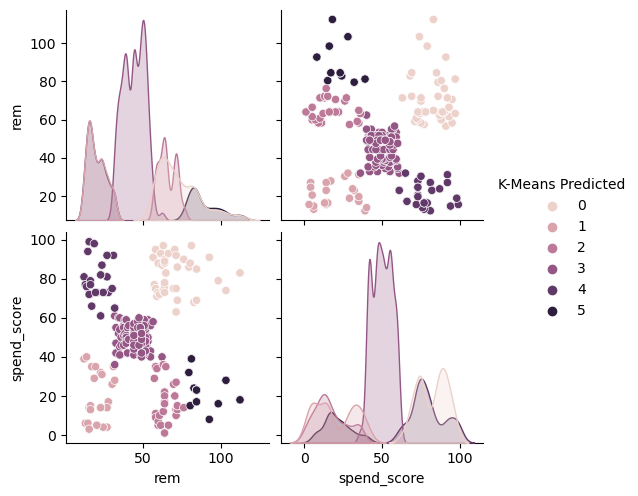

In [35]:
# Use six clusters.

kmeans = KMeans(n_clusters=6,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

## 5. Fit final model and justify your choice

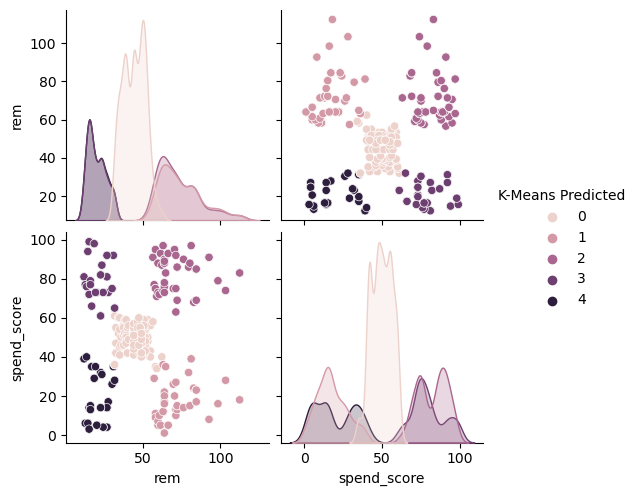

In [36]:
# Apply the final model.
# Use five clusters for the final model.

kmeans = KMeans(n_clusters=5,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

Five gives the clearest separation of clusters. Four clusters appears to group in the middle cluster and the bottom right cluster, that is, average earners of average spend, mixe with low earners of high spend. Six clusters goes too far in that it disaggregates the high earner, low spend customer cluster. This creates a lot of noise and overlap in the distribution graph. Given the business problem and the products in question, it does not seem necessary to go to the level of ranularity that six clusters offer.

Five clusters appear intuitively on the grpahic and best convey the following insghts:
The four different population permutations of low/high spend and low/high earners are approximately equal in number.
A clearly defined, highly populous central cluster. Spend score around 50 and rem just under 50. This group has fairly well defined 'edges'.

In [37]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [38]:
# Visualising the clusters.


# View the DataFrame.
x.head()

rem  spend_score  K-Means Predicted
0  12.30           39                  4
1  12.30           81                  3
2  13.12            6                  4
3  13.12           77                  3
4  13.94           40                  4

<Axes: xlabel='rem', ylabel='spend_score'>

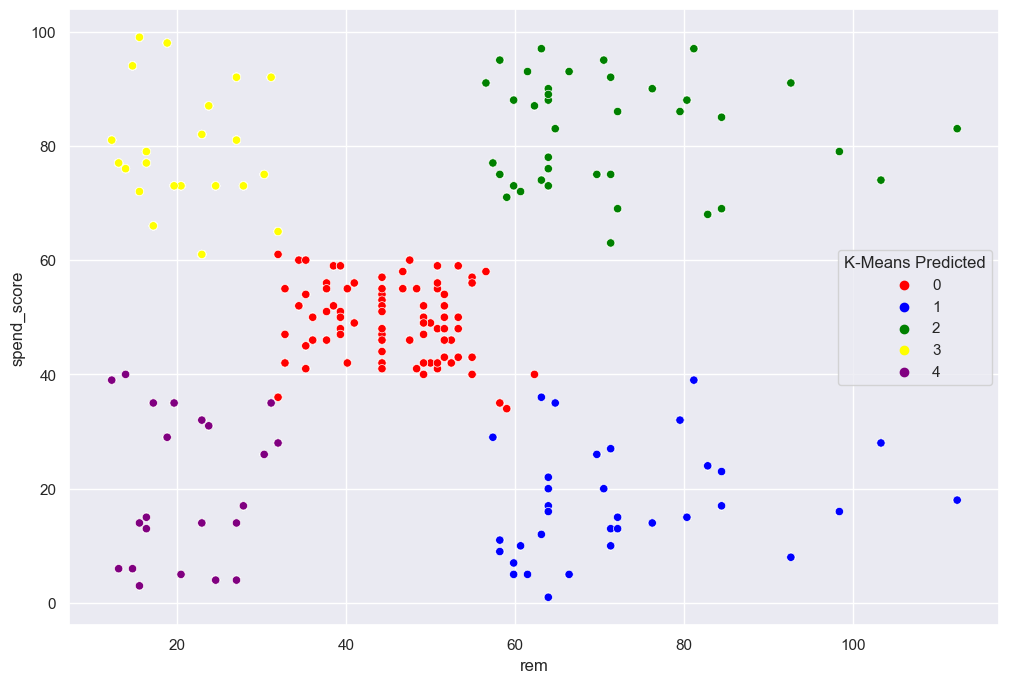

In [39]:
# Visualising the clusters.
# Set the plot size.
sns.set(rc = {'figure.figsize': (12, 8)})

# Create a scatterplot.
sns.scatterplot(x='rem',
               y='spend_score',
               data=x,
               hue='K-Means Predicted',
               palette=['red', 'blue', 'green', 'yellow', 'purple'])

## 7. Insights and observations

Five gives the clearest separation of clusters. Four clusters appears to group in the middle cluster and the bottom right cluster, that is, average earners of average spend, mixe with low earners of high spend. Six clusters goes too far in that it disaggregates the high earner, low spend customer cluster. This creates a lot of noise and overlap in the distribution graph. Given the business problem and the products in question, it does not seem necessary to go to the level of ranularity that six clusters offer.

Five clusters appear intuitively on the grpahic and best convey the following insghts:
The four different population permutations of low/high spend and low/high earners are approximately equal in number.
A clearly defined, highly populous central cluster. Spend score around 50 and rem just under 50. This group has fairly well defined 'edges'.

# 

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. 

## 1. Load and explore the data

In [3]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# Download the following if required.
#nltk.download ('punkt')
#nltk.download ('stopwords')

# Pip install textblob if required.
#!pip install textblob

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [43]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [44]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [45]:
# Determine if there are any missing values.
# Worth noting that there is also an arguement to drop duplicates here too, though we won't for now.

df3.fillna(0, inplace=True)
print(df3.shape)
print(df3.info())
df3.head()

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [46]:
# Review: Change all to lower case and join with a space.

df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [47]:
# Summary: Change all to lower case and join with a space.

df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [48]:
# Replace all the punctuations in review column.

df3['review'] = df3['review'].str.replace('[^\w\s]', '')

# View output.
df3['review']

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*: your unpainted ...
2       nice art, nice printing. why two panels are fi...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game. did not think i would like it when...
1997    great game for all......... keeps the mind nim...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [49]:
# Replace all the puncuations in summary column.

df3['summary'] = df3['summary'].str.replace('[^\w\s]', '')

# View output.
df3['summary']

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [50]:
# Let's just check the number of duplicates in each column individually first.
print('summary duplicates:', df3.summary.duplicated().sum())
print('review duplicates:', df3.review.duplicated().sum())


summary duplicates: 598
review duplicates: 32


In [51]:
# Drop duplicates in both columns. Based on the above this needs to be done separately I think.

df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.drop_duplicates(subset=['review'])

# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

index                                             review  \
0      0  when it comes to a dm's screen, the space on t...   
1      1  an open letter to galeforce9*: your unpainted ...   
2      2  nice art, nice printing. why two panels are fi...   
3      3  amazing buy! bought it as a gift for our new d...   
4      4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [52]:
# Let's just validate the bottom end too as well as check the shape and info.
print(df3.shape)
print(df3.info())
df3.tail()

(1401, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1401 non-null   int64 
 1   review   1401 non-null   object
 2   summary  1401 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.0+ KB
None


index                                             review  \
1396   1989  this is a fun "card" game for people who like ...   
1397   1990  fun for the family. just make certain you agre...   
1398   1992  great game to keep the mind active. we play it...   
1399   1994  we are retired and find this a great way to st...   
1400   1995  the perfect word game for mixed ages (with mom...   

                                                summary  
1396  this is a fun "card" game for people who like ...  
1397  sort of a card game equivalent of scrabble, an...  
1398                 great game to keep the mind active  
1399                                  a great mind game  
1400     the perfect word game for mixed ages (with mom

## 3. Tokenise and create wordclouds

In [5]:
# First we should import some libraries.
# Comment in the below if it is not installed already.
#!pip install nltk

# Import nltk and download nltk's resources for the purpose of tokenisation.
import nltk

# Download punkt if required.
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [54]:
# Create new DataFrame (copy DataFrame).
df3t = df3.copy()

# View DataFrame.
df3t.head()

index                                             review  \
0      0  when it comes to a dm's screen, the space on t...   
1      1  an open letter to galeforce9*: your unpainted ...   
2      2  nice art, nice printing. why two panels are fi...   
3      3  amazing buy! bought it as a gift for our new d...   
4      4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [55]:
# Apply tokenisation to both columns.
df3t['review'] = df3t['review'].apply(word_tokenize)
df3t['summary'] = df3t['summary'].apply(word_tokenize)

# View DataFrame.
df3t.head()

index                                             review  \
0      0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1      1  [an, open, letter, to, galeforce9, *, :, your,...   
2      2  [nice, art, ,, nice, printing, ., why, two, pa...   
3      3  [amazing, buy, !, bought, it, as, a, gift, for...   
4      4  [as, my, review, of, gf9, 's, previous, screen...   

                                             summary  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

# 3.1 Importing WordCloud

In [6]:
# Let's set aside a cell to import some of the relevant libraries
# Comment in the below if worldcloud is not installed.

#!pip install WordCloud

# Import along with matplotlib and seaborn for the actual visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sn

# 3.2 Assigning Tokens to a String

In [57]:
# In order to plot a WorldCloud, we need to assign our tokens to a string.
# We will achieve this by assigning them into a list (to be used later) and then into a string.

# Let's begin by assigning all words in the review column into one list.

all_reviews = []                                   # This line creates a an empty list.
for i in range(df3t.shape[0]):                     # This instructs the loop to start at index = 0.
    all_reviews = all_reviews + df3t['review'][i]  # Adding each review consecutively.
    
# We then place the list item into a string. 
# Define an empty string variable.

revtokens_string = ''

# Then construct the string using the below code.

for value in all_reviews:
    revtokens_string = revtokens_string + value + ' '    # Add the tokenised list to the string.
    
# We then repeat the process above for the summary column. Without explaining each step again.

all_summaries = []
for i in range(df3t.shape[0]):
    all_summaries = all_summaries + df3t['summary'][i]
    
sumtokens_string = ''
for value in all_summaries:
    sumtokens_string = sumtokens_string + value + ' '

In [58]:
# Run either of the below if you want to sense check the new strings.
# revtokens_string
# sumtokens_string

# 3.3 Creating and plotting the WordClouds

In [59]:
# Review: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object. We will name this one word_cloud_rev.

word_cloud_rev = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(revtokens_string) 

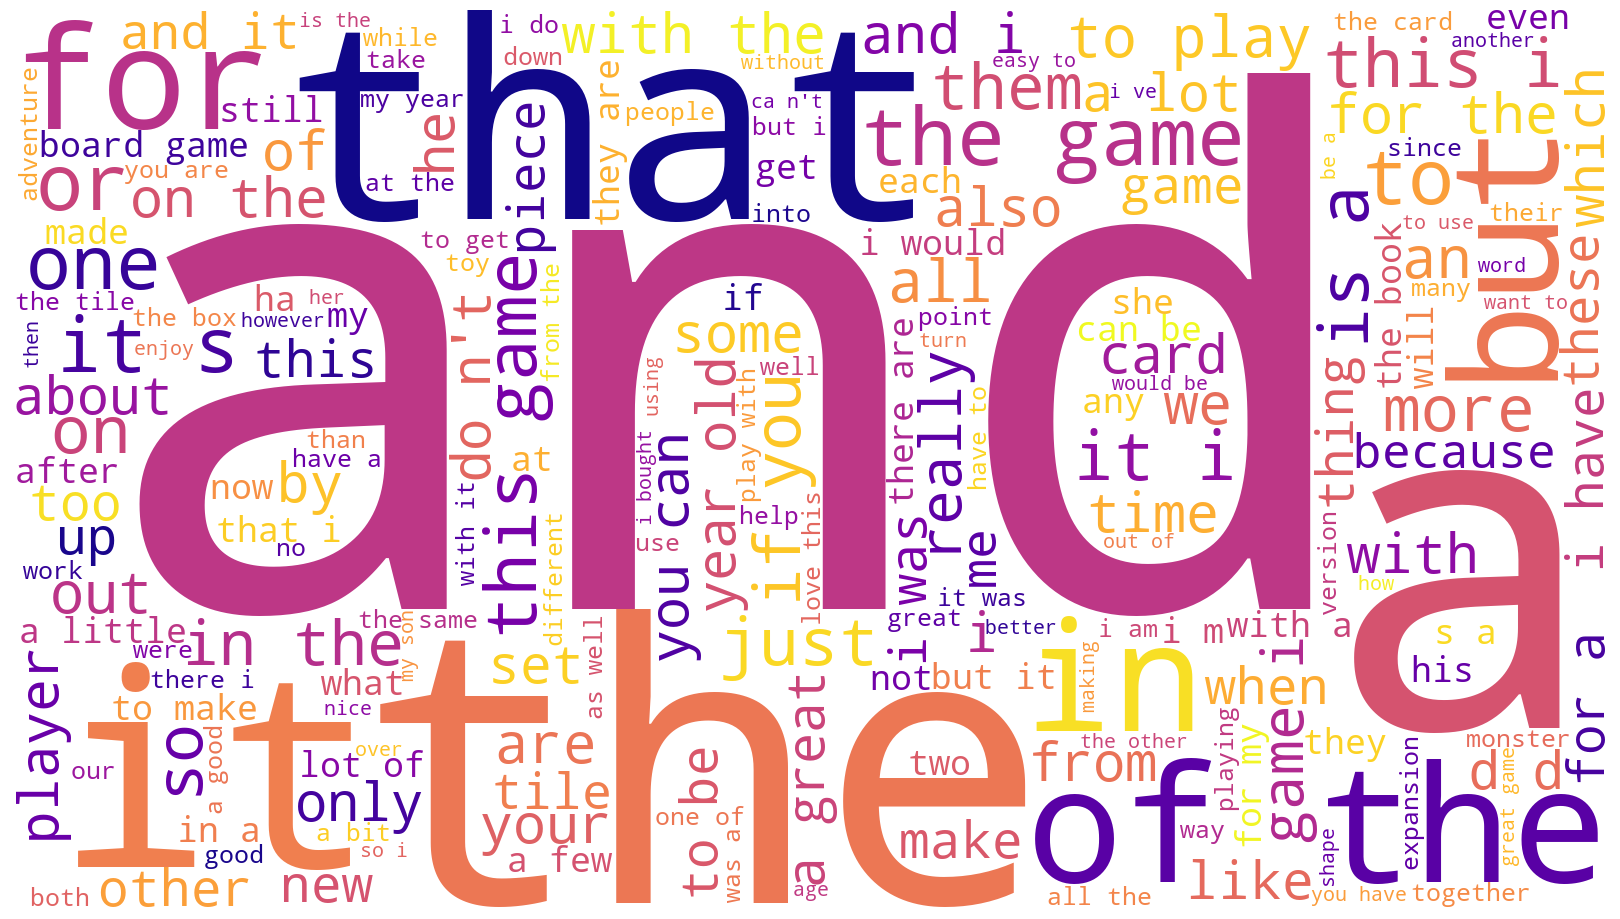

In [60]:
# Review: Plot the WordCloud image.
                   
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [61]:
# Summary: Create a word cloud.

word_cloud_sum = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sumtokens_string) 

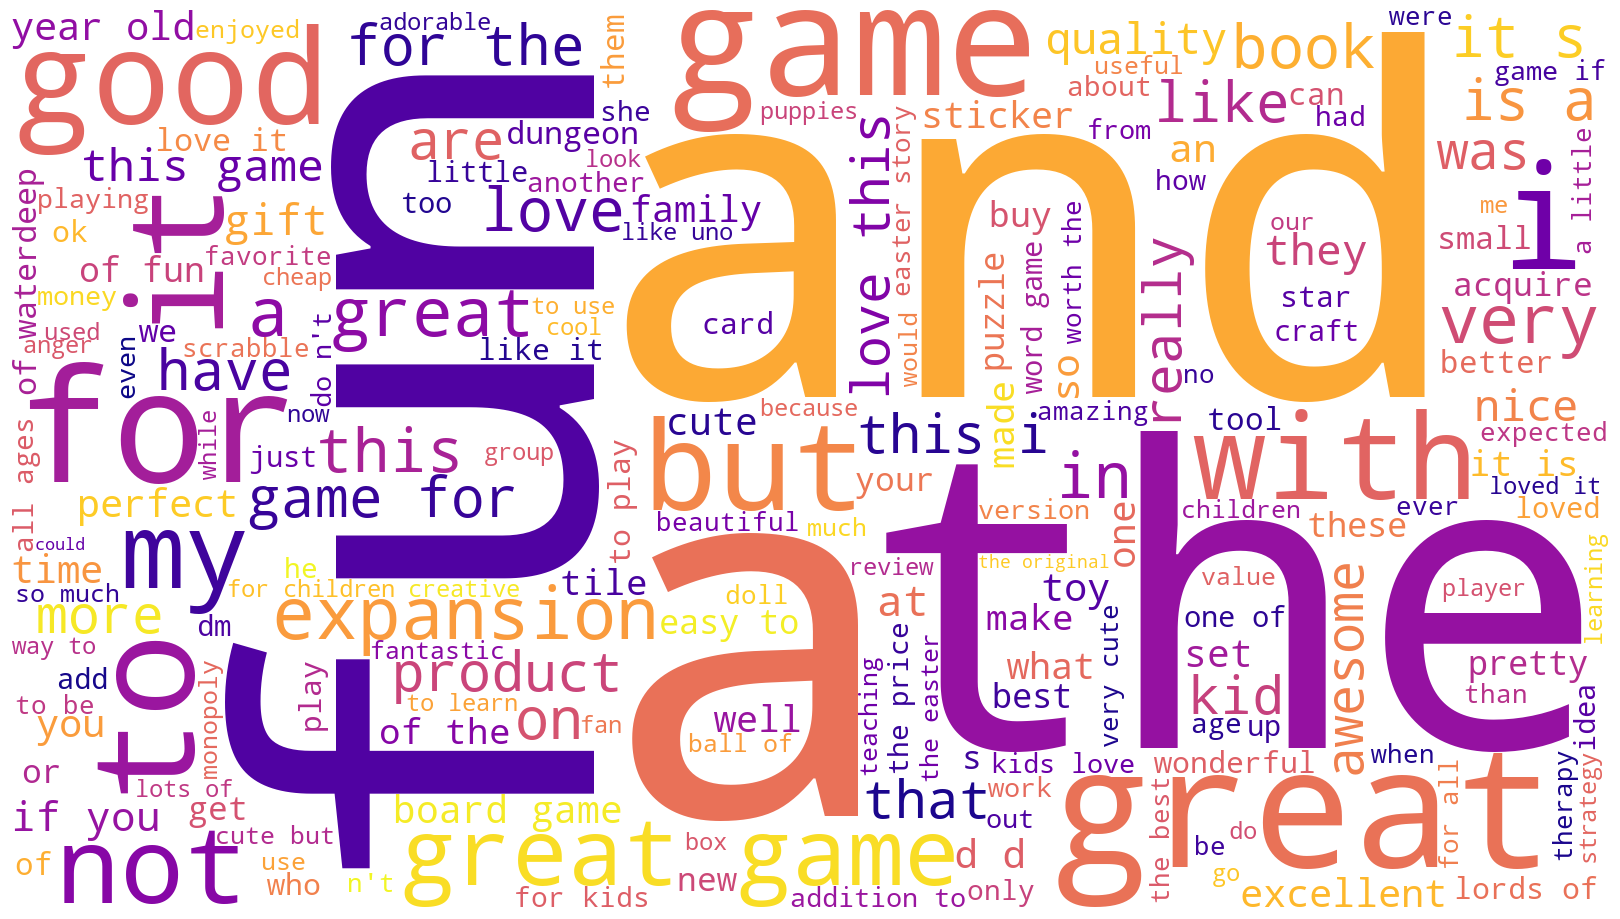

In [62]:
# Summary: Plot the WordCloud image.

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

As we can see from both of the WordClouds there is a domination of stopwords. But this is a good start.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [63]:
# Determine the frequency distribution.
# In order to do this we will use the FreqDist class, applying it to the list (not string) created above.
from nltk.probability import FreqDist

fdist_revs = FreqDist(all_reviews)
fdist_sums = FreqDist(all_summaries)

# Previewing the data. We will do this by generating the most common in each column.
# From the output we can see that the most uninsightful words are the most common.

revs_common = fdist_revs.most_common(10)
sums_common = fdist_sums.most_common(10)

print(revs_common)
print(sums_common)

[('.', 5890), ('the', 5130), (',', 3577), ('and', 3028), ('a', 2923), ('to', 2917), ('of', 2325), ('it', 2258), ('i', 2175), ('is', 1692)]
[('!', 389), ('game', 276), ('the', 259), ('great', 250), ('a', 239), ('for', 232), ('.', 217), ('to', 192), ('fun', 182), ('it', 177)]


### 4b) Remove alphanumeric characters and stopwords

In [64]:
# Delete all the alpanum.
# This step will remove punctuation marks etc.

all_reviews = [word for word in all_reviews if word.isalnum()]
all_summaries = [word for word in all_summaries if word.isalnum()]

In [ ]:
# Remove all the stopwords
# Download the stopword list if required.
#nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.

english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords. We will add a '2' suffix to the lists to avoid confusion.

all_reviews2 = [x for x in all_reviews if x.lower() not in english_stopwords]
all_summaries2 = [x for x in all_summaries if x.lower() not in english_stopwords]

# We then repeat the process of assigning these tokens back into lists.
# Create two new empty string variables.

revtokens_string2 = ''
sumtokens_string2 = ''

# Then construct the strings using the below code.

for value in all_reviews2:
    revtokens_string2 = revtokens_string2 + value + ' '    # Add the tokenised2 list to the string.
    
for value in all_summaries2:
    sumtokens_string2 = sumtokens_string2 + value + ' '    # Add the tokenised2 list to the string.

### 4c) Create wordcloud without stopwords

In [66]:
# Create a wordcloud without stop words.

word_cloud_rev2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(revtokens_string2)

word_cloud_sum2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sumtokens_string2)

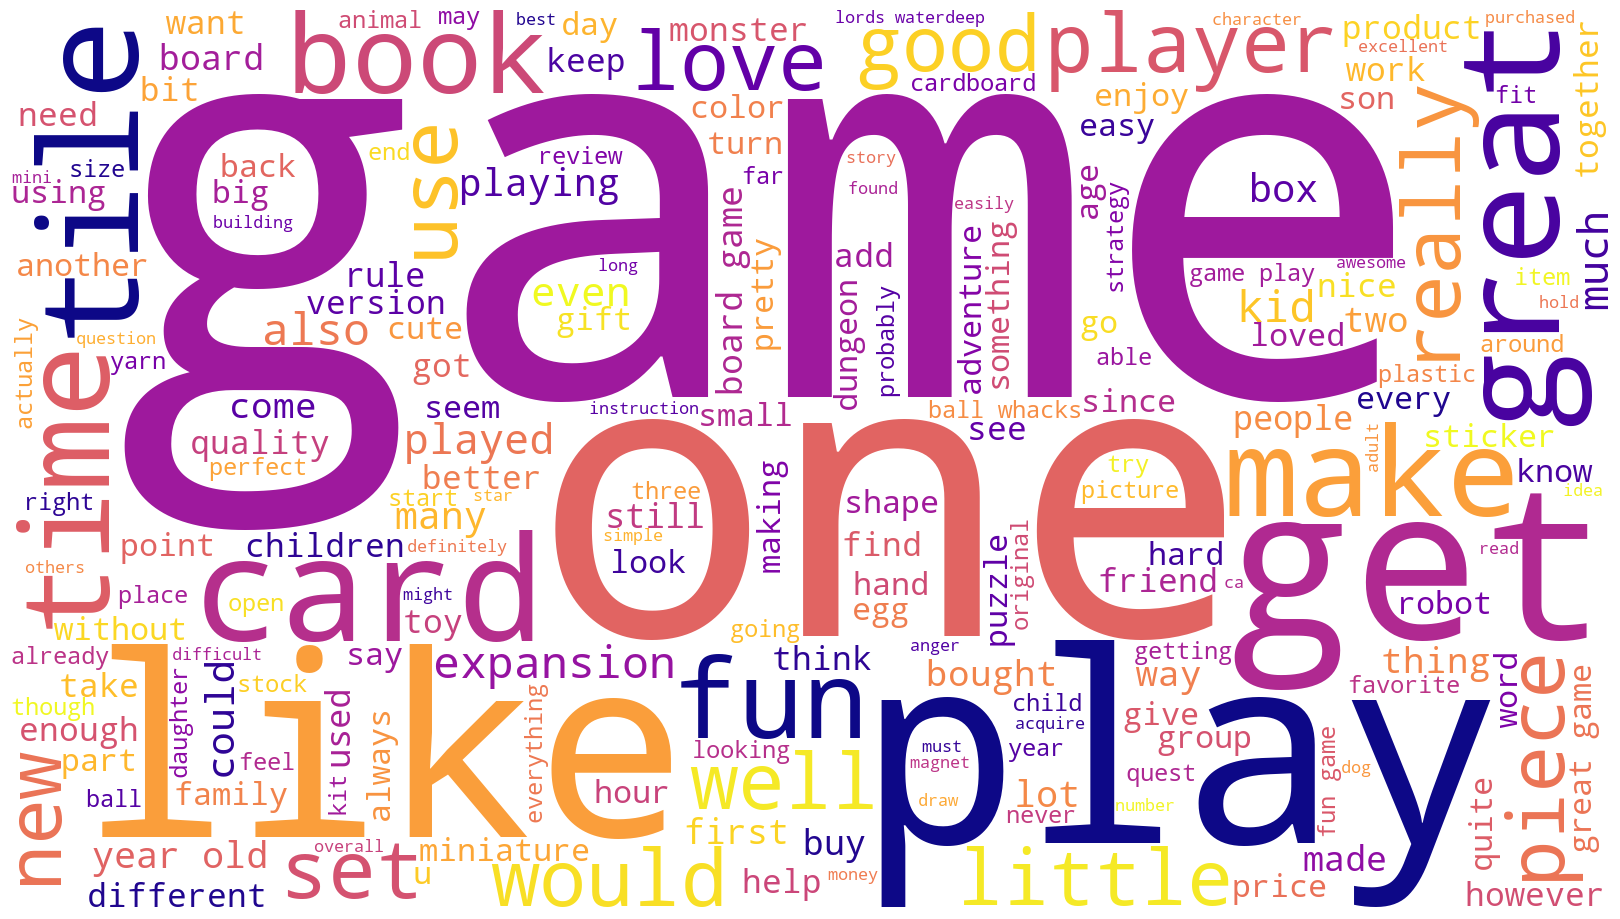

In [67]:
# Plot the wordcloud image.
# We will do review first.

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

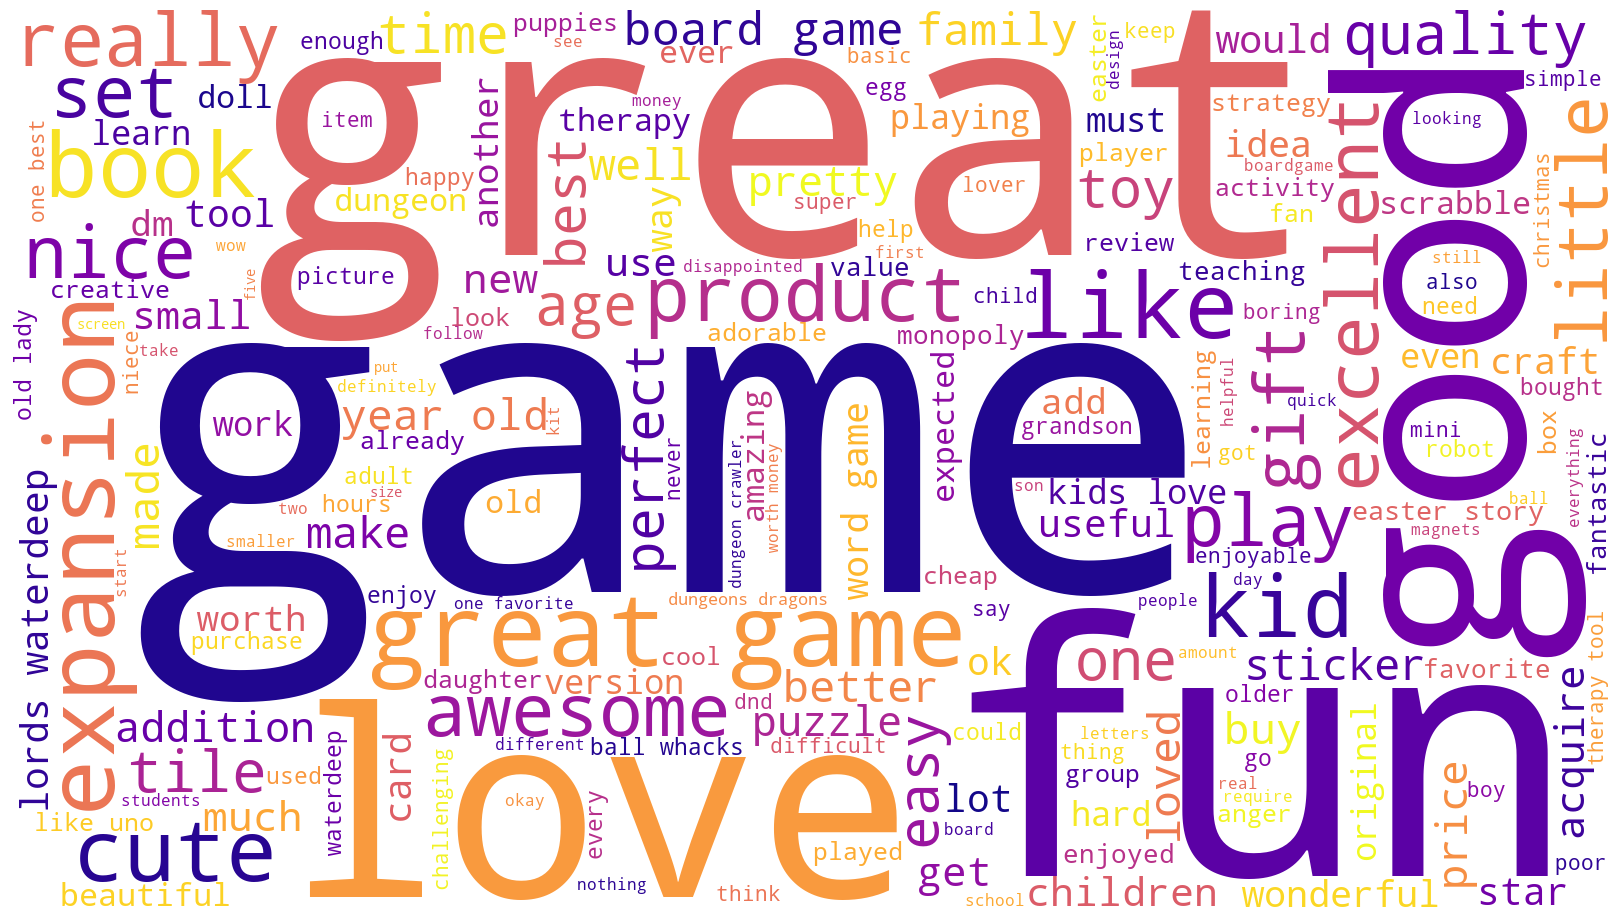

In [68]:
# Finally we can re-do the summaries word cloud.

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [69]:
# Determine the 15 most common words.
# We will repeat the previous process, now applied to the refined word list.

fdist_revs2 = FreqDist(all_reviews2)
fdist_sums2 = FreqDist(all_summaries2)

# Previewing the data. We will do this by generating the most common in each column.
# From the output we can see that the most uninsightful words are the most common.

revs_common2 = fdist_revs2.most_common(15)
sums_common2 = fdist_sums2.most_common(15)

print(revs_common2)
print('')
print(sums_common2)

[('game', 1424), ('one', 487), ('play', 455), ('fun', 428), ('great', 419), ('like', 381), ('get', 300), ('cards', 287), ('really', 286), ('tiles', 286), ('would', 282), ('book', 264), ('time', 252), ('love', 248), ('well', 246)]

[('game', 276), ('great', 250), ('fun', 182), ('good', 87), ('love', 79), ('like', 54), ('kids', 50), ('expansion', 44), ('book', 42), ('cute', 41), ('old', 34), ('product', 30), ('one', 30), ('really', 30), ('awesome', 29)]


In [70]:
# Let us allocate these two lists to two DataFrames.

# Generating a reviews DataFrame.

reviews15 = pd.DataFrame(Counter(all_reviews2).most_common(15),
                        columns=['Word', 'Frequency'])          # We will not use the word column as the index as we want to 
                                                                # check its polarity next.
# Preview the data.

reviews15.head(15)

Word  Frequency
0     game       1424
1      one        487
2     play        455
3      fun        428
4    great        419
5     like        381
6      get        300
7    cards        287
8   really        286
9    tiles        286
10   would        282
11    book        264
12    time        252
13    love        248
14    well        246

In [71]:
# Generating a summaries DataFrame.

summaries15 = pd.DataFrame(Counter(all_summaries2).most_common(15),
                        columns=['Word', 'Frequency'])
                                                        
# Preview the data.

summaries15.head(15)

Word  Frequency
0        game        276
1       great        250
2         fun        182
3        good         87
4        love         79
5        like         54
6        kids         50
7   expansion         44
8        book         42
9        cute         41
10        old         34
11    product         30
12        one         30
13     really         30
14    awesome         29

In [72]:
# Provided function.
# The below function will claculate polarity when applied to a word.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [73]:
# Determine polarity of both columns. 
# As usual we will start with reviews first by populating reviews 15 with another column.

reviews15['polarity'] = reviews15['Word'].apply(generate_polarity)

# View output.
reviews15

Word  Frequency  polarity
0     game       1424      -0.4
1      one        487       0.0
2     play        455       0.0
3      fun        428       0.3
4    great        419       0.8
5     like        381       0.0
6      get        300       0.0
7    cards        287       0.0
8   really        286       0.2
9    tiles        286       0.0
10   would        282       0.0
11    book        264       0.0
12    time        252       0.0
13    love        248       0.5
14    well        246       0.0

In [74]:
# Determine polarity of both columns. 
# As usual we will start with reviews first by populating reviews 15 with another column.

summaries15['polarity'] = summaries15['Word'].apply(generate_polarity)

# View output.
summaries15

Word  Frequency  polarity
0        game        276      -0.4
1       great        250       0.8
2         fun        182       0.3
3        good         87       0.7
4        love         79       0.5
5        like         54       0.0
6        kids         50       0.0
7   expansion         44       0.0
8        book         42       0.0
9        cute         41       0.5
10        old         34       0.1
11    product         30       0.0
12        one         30       0.0
13     really         30       0.2
14    awesome         29       1.0

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In order to plot sentiment and subjectivity scores for the reviews and the summaries, we must return to the df3 dataframe, and calculate these score on the original string.

In [75]:
# First we need to create the subjecticity function.

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [76]:
# In order to achieve this cleanly we will separate the df3 DataFrame into two distince DataFrames.

df3reviews = df3['review']
df3reviews = pd.DataFrame(df3reviews, columns=['review'])

df3summaries = df3['summary']
df3summaries = pd.DataFrame(df3summaries, columns=['summary'])

# Then we can build sentiment polarity and subjectivity scores onto each of these DataFrames.

df3reviews['polarity'] = df3reviews['review'].apply(generate_polarity)
df3summaries['polarity'] = df3summaries['summary'].apply(generate_polarity)

# We then need to calculate the subjecticity score.

df3reviews['subjectivity'] = df3reviews['review'].apply(generate_subjectivity)
df3summaries['subjectivity'] = df3summaries['summary'].apply(generate_subjectivity)

# Finally we ought to just sense check the DataFrames before proceeding.

print(df3reviews.head())
print('')
print(df3summaries.head())

                                              review  polarity  subjectivity
0  when it comes to a dm's screen, the space on t... -0.036111      0.486111
1  an open letter to galeforce9*: your unpainted ...  0.035952      0.442976
2  nice art, nice printing. why two panels are fi...  0.116640      0.430435
3  amazing buy! bought it as a gift for our new d...  0.628788      0.784848
4  as my review of gf9's previous screens these w... -0.316667      0.316667

                                             summary  polarity  subjectivity
0  the fact that 50% of this space is wasted on a...      0.15      0.500000
1  another worthless dungeon master's screen from...     -0.80      0.900000
2                    pretty, but also pretty useless      0.00      0.733333
3                                         five stars      0.00      0.000000
4                                         money trap      0.00      0.000000


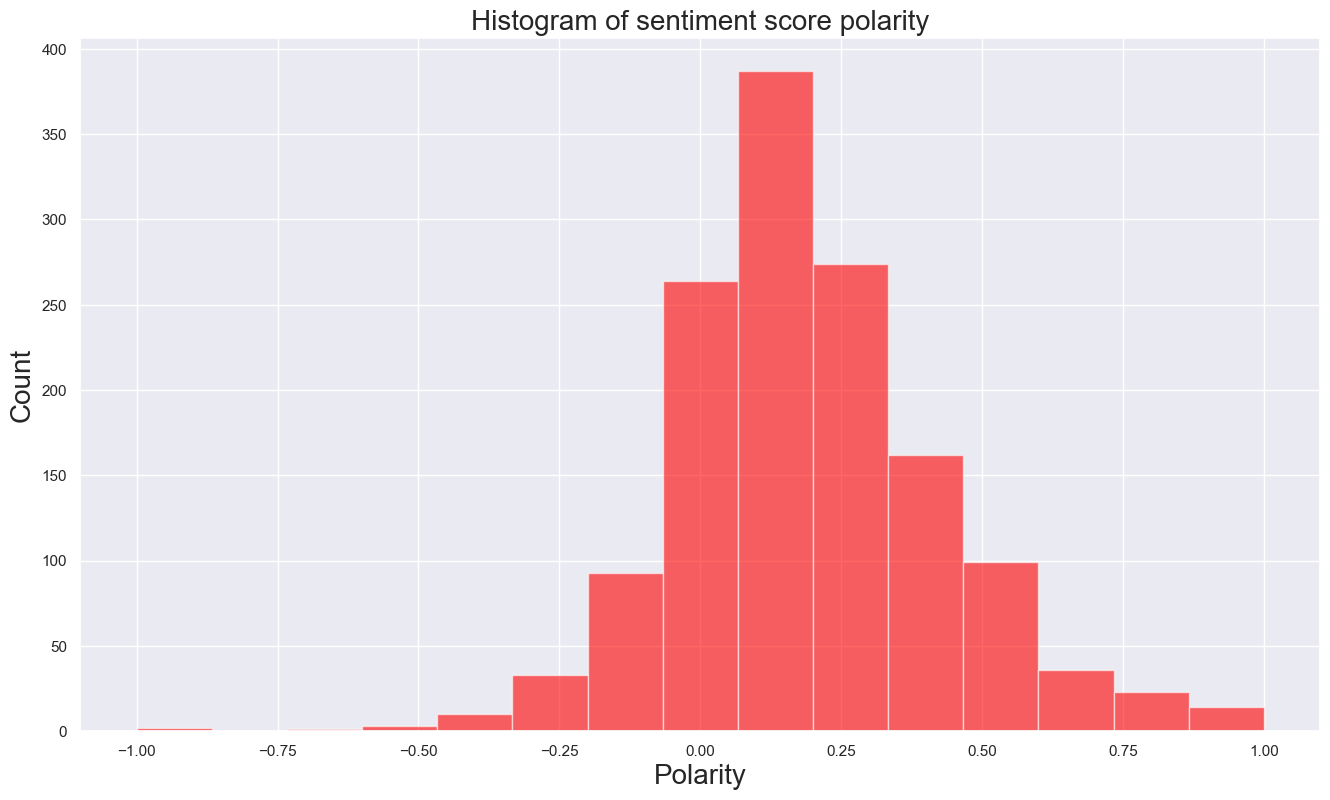

In [77]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity.

# Setting the number of bins to be 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3reviews['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

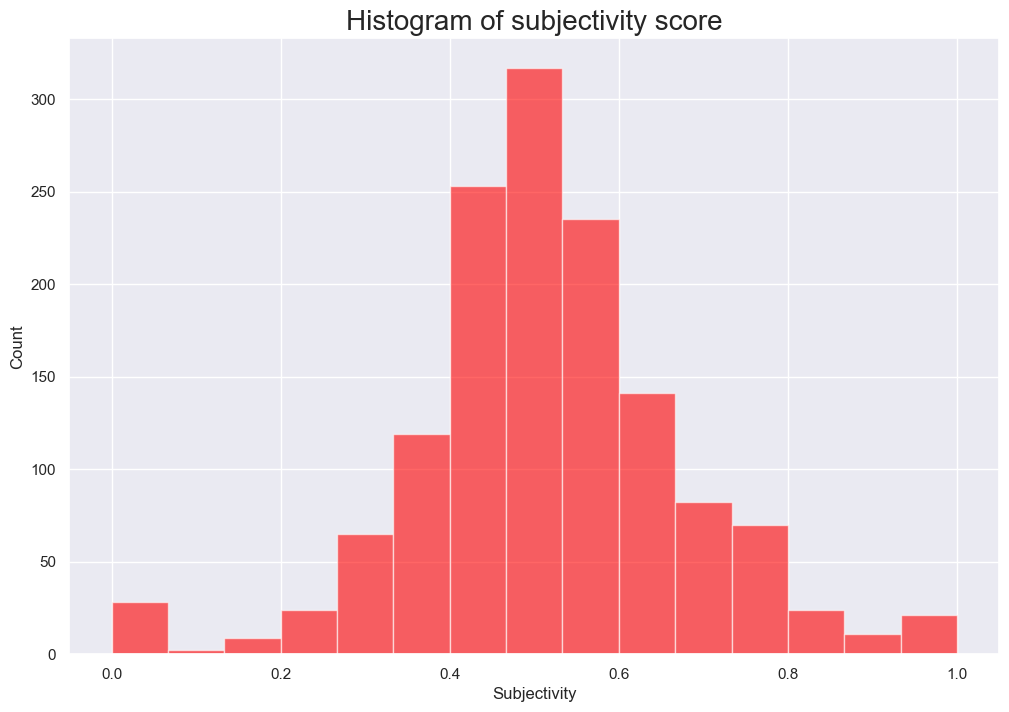

In [78]:
# Histogram of sentiment score.

# Define the bars.
n, bins, patches = plt.hist(df3reviews['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score', fontsize=20)

plt.show()

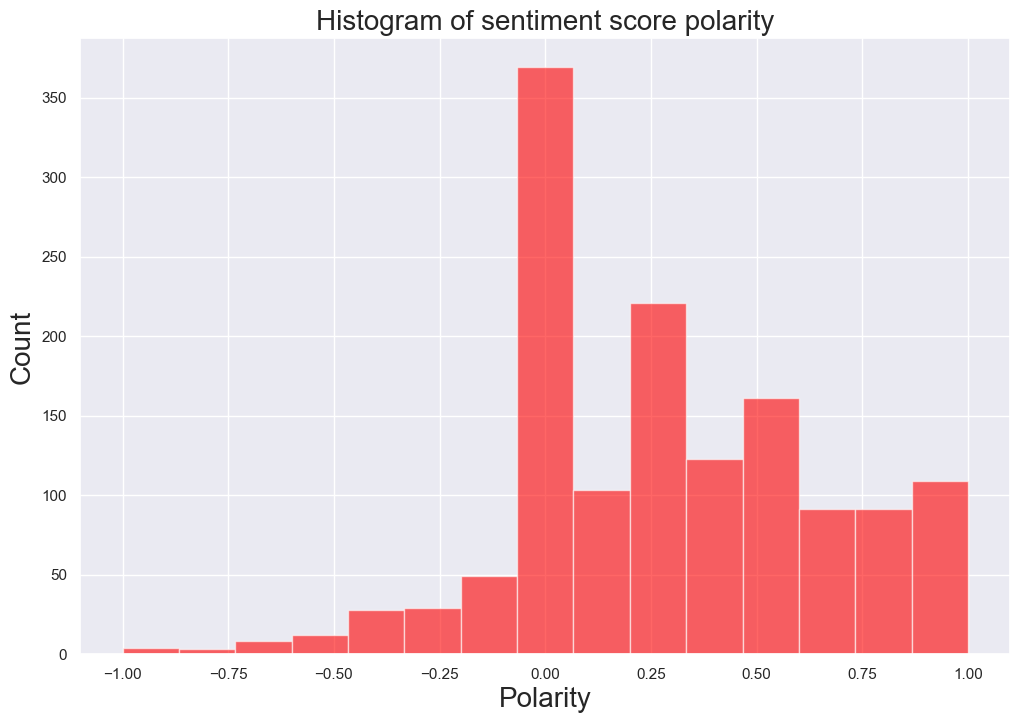

In [79]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity.

# Define the bars.
n, bins, patches = plt.hist(df3summaries['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

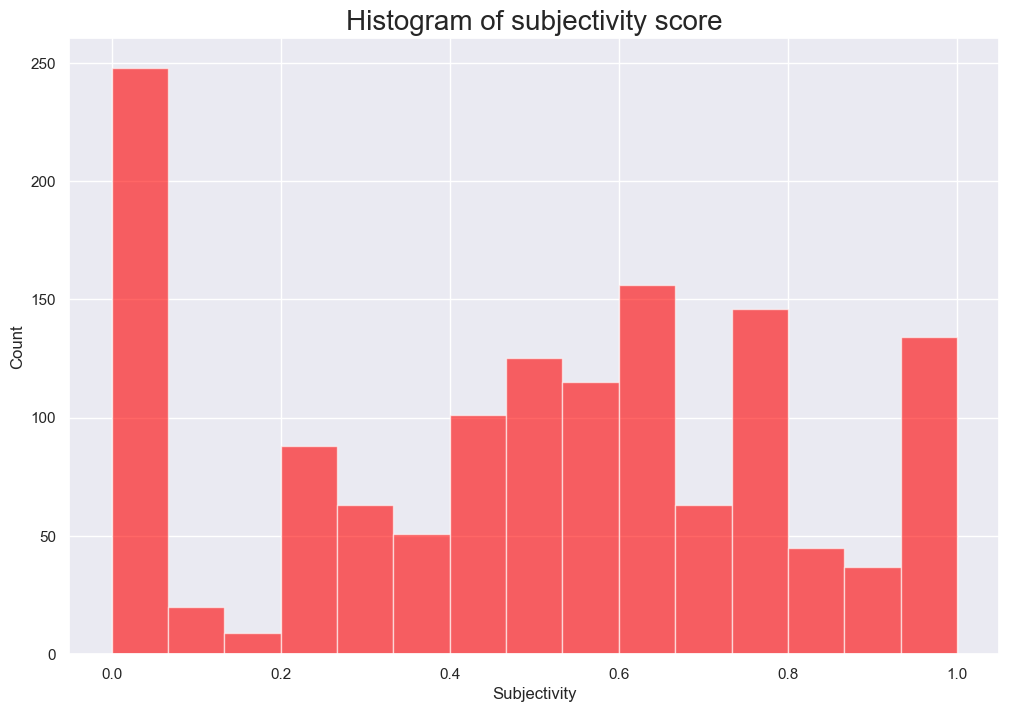

In [80]:
# Histogram of sentiment score.

n, bins, patches = plt.hist(df3summaries['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [81]:
# Top 20 negative reviews.
negative_sentiment_reviews = df3reviews.nsmallest(20, 'polarity')

# View output.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [82]:
# Top 20 negative summaries.
negative_sentiment_summaries = df3summaries.nsmallest(20, 'polarity')

# View output.
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '600px'})

In [83]:
# Top 20 positive reviews.
positive_sentiment_review = df3reviews.nlargest(20, 'polarity')

# View output.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [84]:
# Top 20 positive summaries.
negative_sentiment_summaries = df3summaries.nlargest(20, 'polarity')

# View output.
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '600px'})

## 7.Insights and observations


What inferences can we make from the analysis of the text data in light of the business question posed by TurtleGames:

**How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business?**

Above we have used the text data to extract key themes as well as analyse sentiment expressed by the customer base.
We generated wordclouds for both the reviews and the summaries. Expressions such as 'great', 'good', 'like', 'play' 'love', 'awesome' and 'excellent' stood out. We also notice in the reviews wordcloud that words such as 'game', 'book' and 'play' stand out. This serves as a small insight alone, however could be corroborated with an investigation into the sales data, in order to illustrate a profile of the favoured products and behaviours of the customer base.

Reviews and summaries absolutley skew to the positive which is reassuring for the TurtleGames stakeholders. This is demonstrated by the histograms. A point of interest is the summaries histogram, where the profile of positive sentiment almost appears to be two different histograms superimposed upon one another (high bar, followed by low bar etc). This could be a genuine reflection of how the sentiment groups across all games, but it could also be a reflection of the sentiment of customers preffering different products (the higher bars being video game buyers, the low bars being purchasers of books). I am going to define this avenue of investigation as beyond the scope of this analysis but the gap is interesting regardless. It certainly shows a 'ceiling' and a 'floor' of sentiment among the 'happy' customers. Future analysis should aim to better understand this.

Finally, we can notice some common themes in the top/bottom 20 lists of reviews/summaries. A future analysis should involve manually reading these, identifying any particularly interesting/concerning themes and then conducting an analysis on those. Terms such as 'boring' are clearly very subjective and have been scored as such, however 'incomplete kit', which also scored high on subjectivity, clearly warrents investigation.

# 

# Additional Analysis:

The above serves as a good starting point for the analysis and we have already answered several of the business questions. It is quite clear that we could take this in several directions from this point. The following analysis seeks to answer questions derived from my own use of several mini fish bone diagrams, applied to the business questions posed by Turtle Games. Namely:

TG Question: How do customers engage with and accumulate loyalty points.

My Question: Which customers? Do they engage at all? Does accumulation differ significantly by group?

TG Question: How can customers be segmented into group and which groups can be targetted by the marketing department?

My Question: Can we neatly find groups of engagers and non-engagers. Can we reliably predict them?

# 1. Customer groups and their LP accumilation

Let's just go back to our original set of diagrams. LP vs remuneration and LP vs spend. We were able to see that LP vs age showed no sign of corelation, as was clear with the naked eye but also validated by our OLS fit in which an R-Squared value of 0.002 was output. For now we will disregard this and remind ourselves of the others.

(This will require redefining the terms again as 'x' and 'y' were subsequently used.

In [85]:
# Looking at the DataFrame from step 1.
lpars.head()

age    rem  spend_score   lp
0   18  12.30           39  210
1   23  12.30           81  524
2   22  13.12            6   40
3   25  13.12           77  562
4   33  13.94           40  366

# Spend vs LP

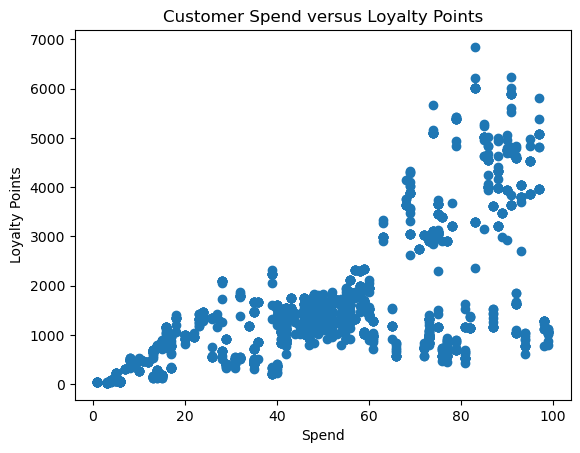

In [86]:
# Independent variable.
y = lpars['lp']

# Dependent variable.
x = lpars['spend_score']

# Let's also just reset the plot size for consistency. 
sns.reset_defaults()

# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.title("Customer Spend versus Loyalty Points")
plt.xlabel("Spend")
plt.ylabel("Loyalty Points")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

# Rem vs LP

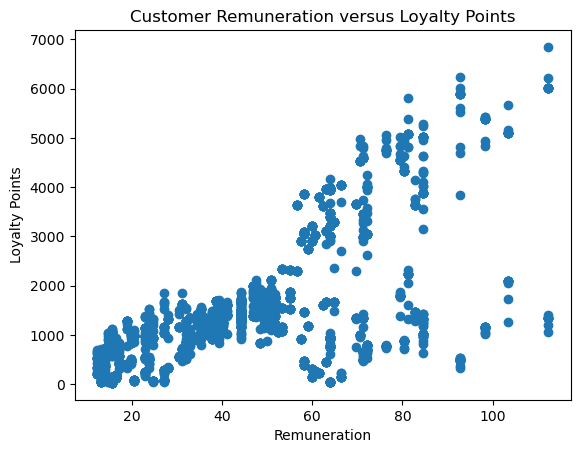

In [87]:
# Independent variable.
y2 = lpars['lp']

# Dependent variable.
x2 = lpars['rem']

# Plot graph with regression line.
plt.scatter(x2, y2)

# Plot the regression line (in red).
plt.title("Customer Remuneration versus Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

Okay, we can see from these plots that a general trend seems to hold until about spend = 60 and rem = 55, after which we get a divergence. For now we will continue using the lpars DataFrame, which we will use to:

Perform multi linear regression modelling using spend and remuneration as our independent variables (we have already established that these don't really correlate with one another and so multicolinearity shouldn't be too high).

We will then re-perform this model on the spend < 60 and rem < 55 cohort.

We will then look at identifying the groups in the data through K-Means clustering and logistic regression.

# MLR

# Import libraries

In [88]:
# let's start by importing the libraries and packages. Best to do this at the start rather than as and when it is needed.

import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

# Define the variables

In [89]:
# Define the dependent variable.
y = lpars['lp']  

# Define the independent variable. We use capital X because we have more than one independent variable.
X = lpars[['rem', 'spend_score']] 

# Fit the model

In [90]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

# A blue box with 'LinearRegression()' will apear below. This is just to confirm the model has been fit.

LinearRegression()

# Run predictions

In [91]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

# Check R-squared, intercept, coefficients

In [92]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('rem', 33.97949882180282), ('spend_score', 32.89269468782101)]

<b> At this point we should pause and look at the R-squared value.

The R-squared value, or coefficient of determination, of 0.8269 can be considered quite high in the context we are working in. In leyman's terms, which would be more apprpriate for our stakholers, we could say that about 82% of variation in customer loyalty points can be attributed to to changes in customer spend and remuneration. 

The coefficient values for both variables are roughly equal, implying that a unit increase in either would translate to a similar increase in loyalty point accumilation.

Let's look at predicting some values. We will use 100 for both rem and spend. 

# Specific predictions

In [93]:
# Create a variable 'New_rem' and define it as 100.
New_rem = 100

# Create 'New_spend' and define it as 100.
New_spend = 100  

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_rem ,New_spend]]))


# REPEAT THE ABOVE WITH SEVERAL DIFFERENT PAIRS OF VALUES AT YOUR LEISURE. CONSIDER WHETHER THEY MAKE SENSE IN LIGHT OF
# THE PREVIOUS PLOTS.

Predicted Value: 
 [4986.91425395]


<b> Again, let us pause here to consider the following:
    
    We have built the model that statistically is a good 'fit', meaning that we have identified variables (spend and rem) that laregly explain the changes in LP. We can even input rem and spend values of a hypothetical customer and predict their LP score.
    
    However we should validate this process by checking the model accuracy. We can achieve this by splitting the data and re-training it on one subset, predicting values, then comparing those values to the other subset.

# Splitting and re-fitting the data

In [94]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [95]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant. This constant can be regarded as '1', and is the coefficient of the intercept value.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                     lp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:12:01   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1700.3237     39.588    -42.950      

<b> Okay, lets interpret this output. <b>
    
    Out Adjusted R-Squared value is 0.83, which is comparable to our previous score on the unsplit data. This is a reassuring sign. 
    Our coefficient values are similar at 32-34. The negative intercept value of -1700 is also of little concern and should not be regarded as invalidating the model in any way as cleary a zero rem, zero spend customer will have zero LP.
    The standard errors and corresponding t values indicate that rem and spend are highly statistically significant. 

# Running a regression test

In [96]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train) 

LinearRegression()

In [97]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


In [98]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ -725.11711735  2976.65149188  2644.50590347  1416.28990278
  1434.2479047   1535.45165243   709.53845826  1358.38381754
  1577.07452533  3212.92022784  1170.66219209  1588.48826342
  1589.70563198  2360.07003078  1201.63127443  1582.78139438
  1642.74224297   657.71921584  -106.10091912  -833.24510268
  1354.27429082  -188.12929636  1754.52233399  1256.34267501
  1422.83416662  1616.64263488  3855.98127081  1541.53849524
  1742.27120111  1956.16988192   128.11305348   859.2893165
  1075.54528717  1575.01976198  1484.84977857  1179.64119305
   979.28846095  1756.19712359  1517.4936505    979.28846095
  1217.15453924  1577.07452533  1440.79216854  4253.41460309
  4257.06670877  -454.98714089  1575.01976198  1434.2479047
  1474.65340904  1468.94654     1548.46273285   960.11309046
   796.89373078  -647.57824059  1640.30750585  1527.31004626
   311.72515222  3974.30562567  1548.46273285  3233.31296689
  1306.94454888  1517.4936505   1283.27967791  1434.2479047
  

In [99]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

81.44236432529975


<b> Therefore:<b>
    
    The model that was trained on the train sample (80% of the original data) is about an 81.44% goodness of fit on the unseen test data (20% of the original data). This is quite a high amount. We should check for multicollinearity between our independent variables to validate this figure.

# Checking for multicollinearity

In [100]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor     features
0        8.91        const
1        1.00          rem
2        1.00  spend_score


A value of '1' represents neglidgible correlation between variables. This is perhaps not unexpected. As we have already plotted rem vs spend above, and again below, we should not be surprised in the lack of correlation. 

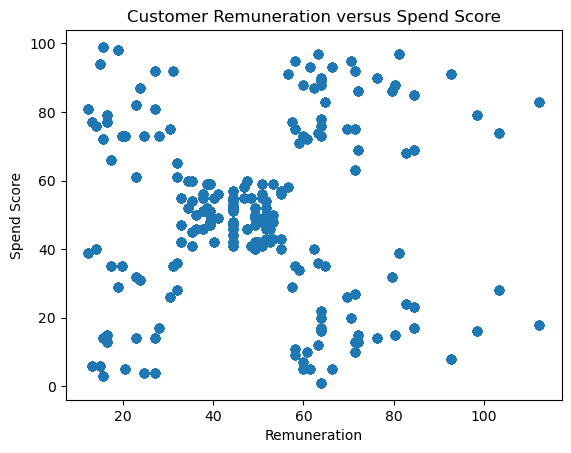

In [101]:
# Independent variable.
y3 = lpars['spend_score']

# Dependent variable.
x3 = lpars['rem']

# Plot graph with regression line.
plt.scatter(x3, y3)

# Plot the regression line (in red).
plt.title("Customer Remuneration versus Spend Score")
plt.xlabel("Remuneration")
plt.ylabel("Spend Score")

# Set the x and y limits on the axes.
#plt.xlim(0)
#plt.ylim(0)

# View the plot.
plt.show()

Finally, let us evaluate the model by checking the mean errors. This is a measurment of by how much our predicted values deviate from the actual values, which were not part of the training data.

# Evaluating the model

In [102]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred)) 

# We can interpret this as follows:
# Mean absolute error: the mean of the absolute differences between actual and predicted values.
# Mean square error: the mean of the squared differences between the actual and predicted values. 

Mean Absolute Error (Final): 429.66362016909113
Mean Square Error (Final): 300944.0917834269


# Problem:

We then have the ask, what does this mean for us? Given the scale of loyalty points we are working with, 0- -> 7000, an error of 429 is quite significant, especially at the lower levels of around 1000-2000, which is where most customers sit. Histogram below:

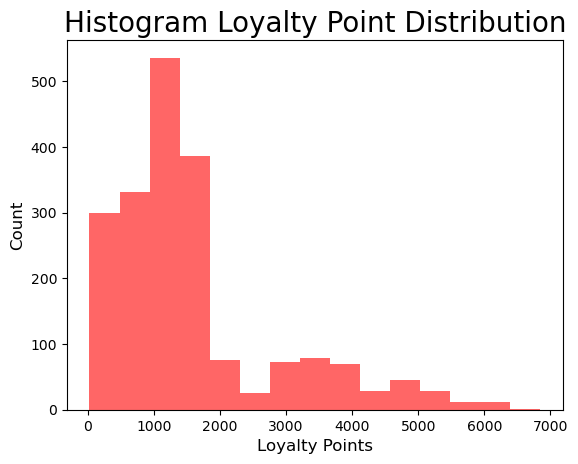

In [103]:
# Histogram of loyalty points score.

# Define the bars.
n, bins, patches = plt.hist(lpars['lp'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Loyalty Points', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram Loyalty Point Distribution', fontsize=20)

plt.show()

# Theory:

However the situation is even worse than that. If this mean error were constant across the range the model has been trained on, we might expect a mean square error of 429^2 = 184 000 (approx). The fact that it is far higher than this suggest that the errors are not even across the range. They are in all liklihood much higher towards the higher end, where their squared value contributs disproportionatly to the mean square error.

We have been able to see from the start that the data does not fit the classical linear regression profile. While at first, customers appear to accumilate LP in a linear fashion, at about rem = 55 and spend = 60, they diverge, with some customers to accumilate and engage as their spend/rem increases, and other staying roughly static. As spend/rem increases, the gap between engagers and non-engagers increases. 

This linear model likely derives the vast majority of its mean square error (and its mean absolute error) from predictions it makes within that gap. To test this, let us re-run all of the above steps, while restricting the data set to cutomers to below spend/rem = 60. I shall unimaginitively refer to this group of customers as 'seeds' going forward (yet to bloom into either engagers or non-engagers).



# Restricting the data

In [104]:
# Restrict lpars according to the specified parameters. I am restricting to an even greater degree than mentioned above.

lpars_seeds = lpars[(lpars['spend_score'] <= 55) & (lpars['rem'] <= 50)]

print(lpars_seeds.info())
print(lpars_seeds.describe())
lpars_seeds.head()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 1991
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          724 non-null    int64  
 1   rem          724 non-null    float64
 2   spend_score  724 non-null    int64  
 3   lp           724 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.3 KB
None
              age         rem  spend_score           lp
count  724.000000  724.000000   724.000000   724.000000
mean    43.099448   33.649448    37.490331   929.461326
std     14.463616   11.630948    16.239942   559.377220
min     17.000000   12.300000     3.000000    25.000000
25%     33.000000   22.960000    29.000000   390.750000
50%     42.500000   36.080000    42.000000  1107.000000
75%     51.250000   44.280000    50.000000  1387.250000
max     72.000000   49.200000    55.000000  1923.000000


age    rem  spend_score   lp
0   18  12.30           39  210
2   22  13.12            6   40
4   33  13.94           40  366
6   37  14.76            6   61
8   66  15.58            3   31

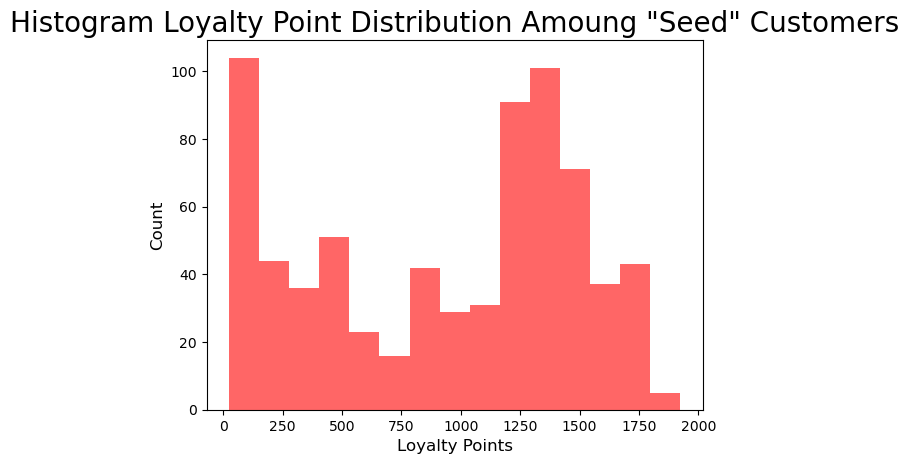

In [105]:
# Let's also veryify the split with a histogram.

# Define the bars.
n, bins, patches = plt.hist(lpars_seeds['lp'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Loyalty Points', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram Loyalty Point Distribution Amoung "Seed" Customers', fontsize=20)

plt.show()

The data is not totally normally disributed which indicates it is not ideal for modelling. However we have at least lost the long right tail present in the above plot which represented the engagers. The overall count has dropped too, indicating the non-engagers have also been appropriately removed.

# Define new variables and splitting the data

We have already determined that rem and spend are good independent variables to pick. So we can skip straight to splitting the data based on the new variables we assign.

In [106]:
# Define the dependent variable.
ys = lpars_seeds['lp']  

# Define the independent variable. We use capital X because we have more than one independent variable.
Xs = lpars_seeds[['rem', 'spend_score']] 

In [107]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
Xs_train, Xs_test, Ys_train, Ys_test = sklearn.model_selection.train_test_split(Xs, ys,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

# Training and testing subsets

In [108]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant. This constant can be regarded as '1', and is the coefficient of the intercept value.
model_s = sm.OLS(Ys_train, sm.add_constant(Xs_train)).fit()

# Set the predicted response vector.
Ys_pred = model_s.predict(sm.add_constant(Xs_test)) 

# Call a summary of the model.
print_model_s = model_s.summary()

# Print the summary.
print(print_model_s)  

                            OLS Regression Results                            
Dep. Variable:                     lp   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     4114.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:12:19   Log-Likelihood:                -3693.1
No. Observations:                 579   AIC:                             7392.
Df Residuals:                     576   BIC:                             7405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -584.0381     18.433    -31.685      

<b> Okay, lets interpret this output. <b>
    
    Our Adjusted R-Squared value has improved from 0.83 to 0.935 which is a good sign and indicates the new model is a better fit.    
    The t values, although much smaller than the previous model, remain high objectively. 

# Running a regression test on the unseen data

In [109]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(Xs_train, Ys_train) 

# Call the predictions for X in the train set.
ys_pred_mlr = mlr.predict(Xs_train) 

# Call the predictions for X in the test set.
ys_pred_mlr = mlr.predict(Xs_test) 

# Print the R-squared value.
print(mlr.score(Xs_test, Ys_test)*100)  

92.44783098774424


The model is a very good fit for the the unseen 'seed' data. The goodness of fit has increased from 81.44% to 92.44%. However as before, we must test the mean errors to be truly confident in the predictions of the model.

In [110]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Ys_test, Ys_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Ys_test, Ys_pred))  

Mean Absolute Error (Final): 119.00526243852748
Mean Square Error (Final): 23718.869211331395


# Conclusion:

We have gained significant evidence that rem and spend are important variables in the prediction of loyalty points.

By restricting the data to lower spend and remuneration customers, the goodness of fit of the MLR model increases substantially. That is to say, when restricted, changes in these variables explain to a greater to degree, changes in LP. 

The mean square errors remain quite large, however in light of the business case, this is perhaps not a critical issue. We have explained with confidence the method of accumilation and among which segment of the customer base this occurs, even if our specific predictions might be off. 

# 2. Customers groups: Engagers and non-engagers

<b> We can see that there comes a point where the customer experience divergers. This fork can easily be identified in hindsight but what if there were ways to identify the traits of engagers and non-engagers present in the seedling population? This would enable us to intervene or market towards seed-non-engagers and potentially interrupt the process of them blossoming into non-engagers. 

Before we deep dive into this, lets return to the original data set and examine some of the characteristics that could predict customer behaviour. We will need to read it back in as the object was manipulated at the start.

In [2]:
# Load the CSV file(s) as reviews.

data = pd.read_csv('turtle_reviews.csv')

# Any missing values?
# We can run the below code to fill NA values.

data.fillna(0, inplace=True)

# We should also run the below code to drop duplicate entires.

data = data.drop_duplicates()

data.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Lets just verify the categories in each categorical variable column and the counts of each.

print(data['gender'].value_counts())
print("")
print(data['education'].value_counts())
print("")
print(data['language'].value_counts())
print("")
print(data['platform'].value_counts())

gender
Female    1120
Male       880
Name: count, dtype: int64

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

language
EN    2000
Name: count, dtype: int64

platform
Web    2000
Name: count, dtype: int64


Okay, we will remove language and platform as they are uniform, as well as product, review and summary. <b> NOTE: while I do think the prospect of conducting this analysis with the inclusion of expressed sentiment which we have investigated above is interesting, I think that this should be parked for now. NLP modelling can miss the mark and should be taken as a guide of customer sentiment overall, rather than a definitive measure of any one customer's feelings. We will therefore leave it out for now.

In [4]:
# Remove the unwanted columns and rename the Dataframe.

data_groups = data[['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education']]

# We should also rename the columns as we did previously for consistency.

data_groups = data_groups.rename(columns={'remuneration (k£)': 'rem', 'spending_score (1-100)': 'spend_score', 
                                          'loyalty_points': 'lp'})

# Sense check the DataFrame.
data_groups.head()


gender  age    rem  spend_score   lp education
0    Male   18  12.30           39  210  graduate
1    Male   23  12.30           81  524  graduate
2  Female   22  13.12            6   40  graduate
3  Female   25  13.12           77  562  graduate
4  Female   33  13.94           40  366  graduate

# Basic explorative visualisation

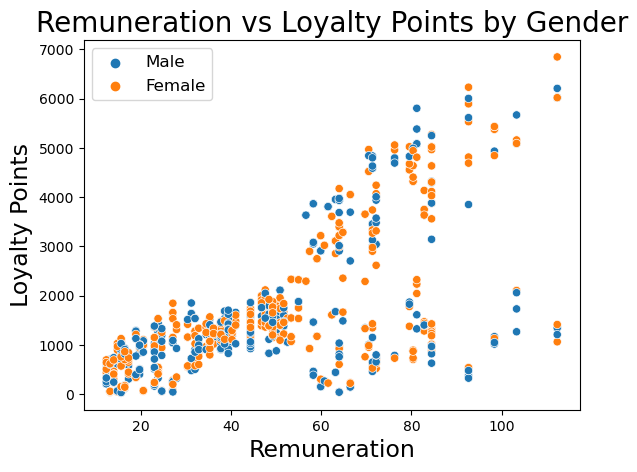

In [5]:
# We are still interested in loyalty point accumilation, so let's see how that occurs, overlaying gender and education.

# Create a scatterplot.
sns.scatterplot(x='rem', y='lp', data=data_groups, hue='gender')

# Add title
plt.title('Remuneration vs Loyalty Points by Gender', fontsize = 20)

# Add bespoke axis labels
plt.xlabel('Remuneration', fontsize = 17)
plt.ylabel('Loyalty Points', fontsize = 17)

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

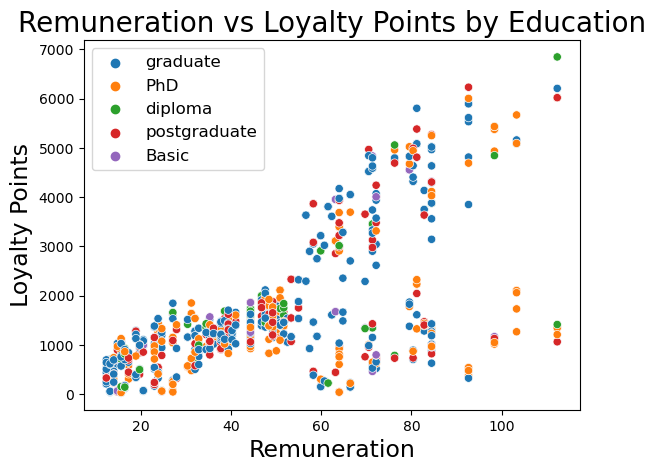

In [6]:
# Create a scatterplot.
sns.scatterplot(x='rem', y='lp', data=data_groups, hue='education')

# Add title
plt.title('Remuneration vs Loyalty Points by Education', fontsize = 20)

# Add bespoke axis labels
plt.xlabel('Remuneration', fontsize = 17)
plt.ylabel('Loyalty Points', fontsize = 17)

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

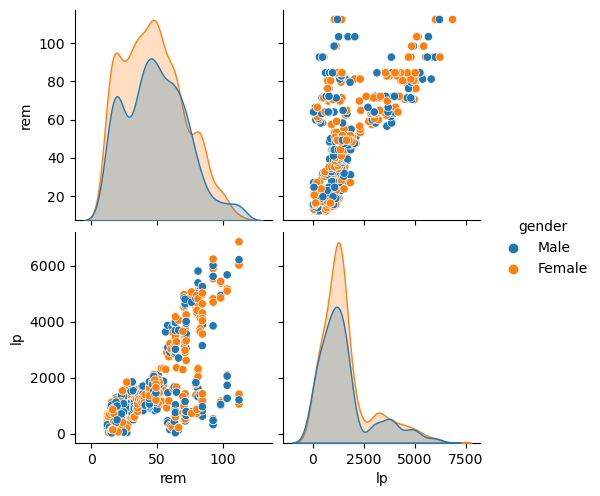

In [7]:
# Create a pairplot with Seaborn.

groups = data_groups[['rem', 'lp']]

sns.pairplot(data_groups,
            vars=groups,
             hue = 'gender',
            diag_kind = 'kde')

plt.show()

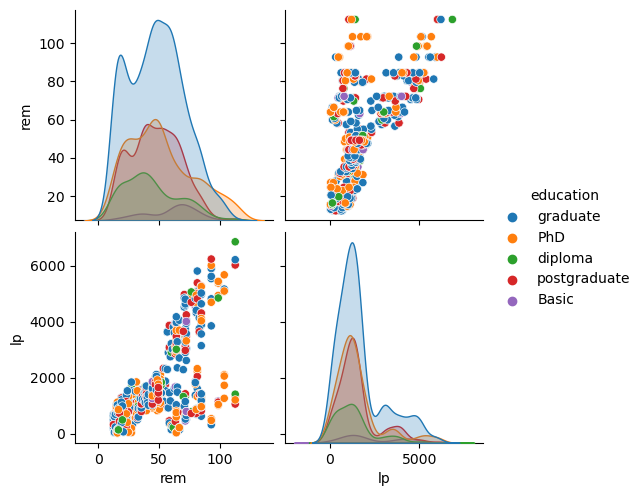

In [8]:
# Create a pairplot with Seaborn.

groups = data_groups[['rem', 'lp']]

sns.pairplot(data_groups,
            vars=groups,
             hue = 'education',
            diag_kind = 'kde')

plt.show()

<b> We can clearly see from these graphs that there is not much of a discernable pattern, at least to our eye. This therefore justifies the utilisation of ML techniques to seek patterns the human eye can't.

# K-Means clustering (again)

While it is tempting to apply labels to the data for engagers, non-engagers and seeds using the 'eye test', let's see if we can use a more mathematical approach. The benefit of this is that it will segregate data points more neatly, where the human eye might struggle to do so, such as where data points overlap. As above we will use the elbow and sillhouette method to gauge how many clusters we should use and sense check this with the perception that there are three.

# Elbow Method

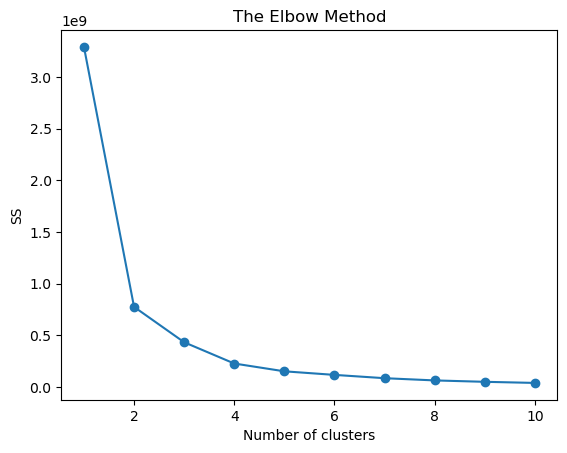

In [9]:
# Import the KMeans class.
from sklearn.cluster import KMeans

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++',
                   max_iter = 500,
                   n_init = 10,
                   random_state = 42)
    kmeans.fit(groups)                       # Assign here the name of the object we defined above. 
    ss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

# Silhouette method


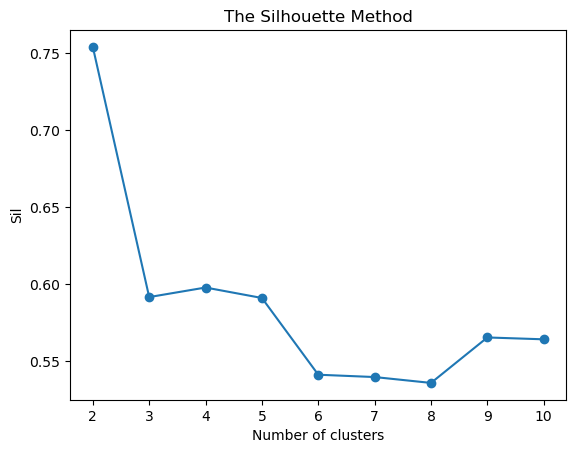

In [10]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(groups)     # Assign here the name of the object we defined above. 
    labels = kmeans_s.labels_
    sil.append(silhouette_score(groups,               # And here too.
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Based on the results above, 3 seems like a reasonable number of clusters. Let us proceed with this and re-evaluate if necessary.

# Evaluate the model

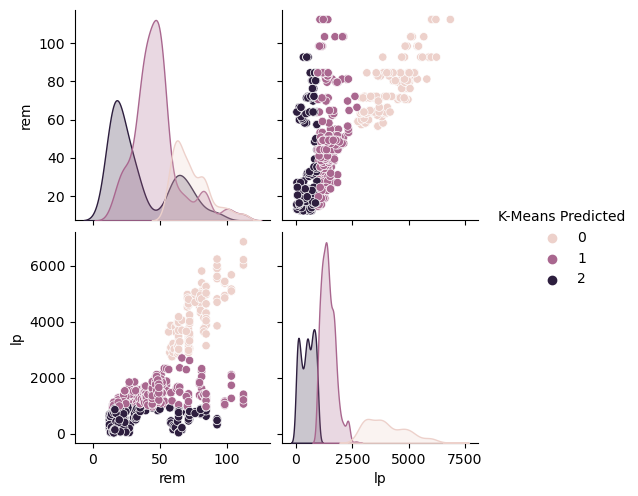

In [11]:
# We will use three clusters.
kmeans = KMeans(n_clusters = 3,
               max_iter = 15000,
               init='k-means++',
               random_state=42).fit(groups)

clusters = kmeans.labels_
groups['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(groups,
            hue='K-Means Predicted',
            diag_kind = 'kde')

plt.show()

We can see that this looks to have captured the engagers cluster as we might have expected but not the other two. Let's re-run this with five clusters this time. (Copy and paste the code above, we are fine to re-define the objects we already created there).

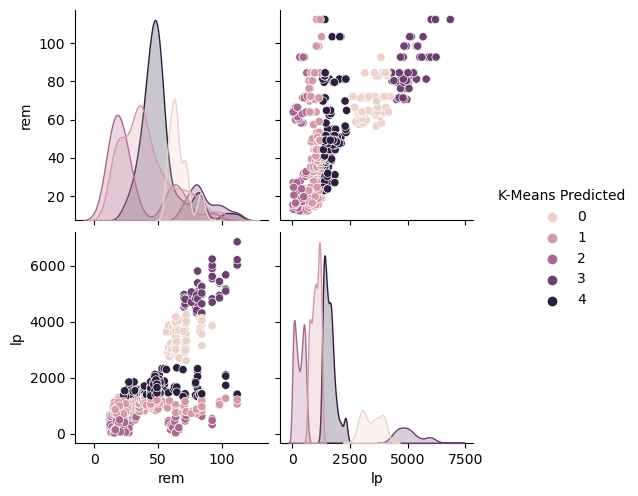

In [12]:
# We will use five clusters.
kmeans = KMeans(n_clusters = 5,
               max_iter = 15000,
               init='k-means++',
               random_state=42).fit(groups)

clusters = kmeans.labels_
groups['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(groups,
            hue='K-Means Predicted',
            diag_kind = 'kde')

plt.show()

# Reassess

We can see from the plot that the non-engagers population is not as well defined. It tends to trail off from the seed population. Let's attempt this process again, looking this time at spend vs rem, where, although the engagers and non-engagers groups overlap a bit more, the non-engagers group is more populated.

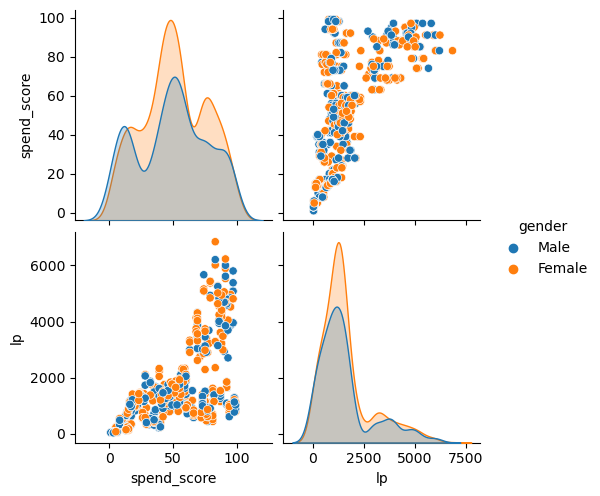

In [13]:
# Create a pairplot with Seaborn.

groups2 = data_groups[['spend_score', 'lp']]

sns.pairplot(data_groups,
            vars=groups2,
             hue = 'gender',
            diag_kind = 'kde')

plt.show()

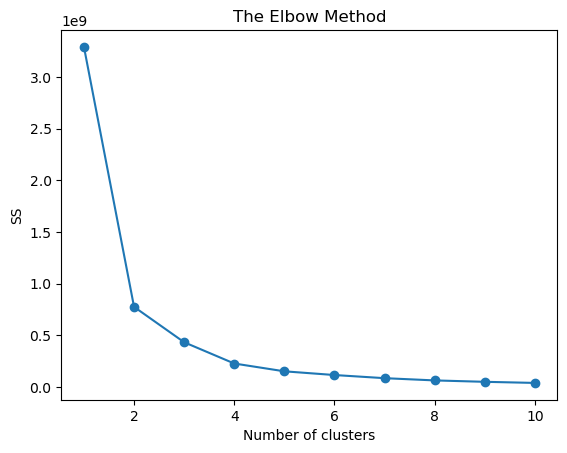

In [14]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++',
                   max_iter = 500,
                   n_init = 10,
                   random_state = 42)
    kmeans.fit(groups2)                       # Assign here the name of the object we defined above. 
    ss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

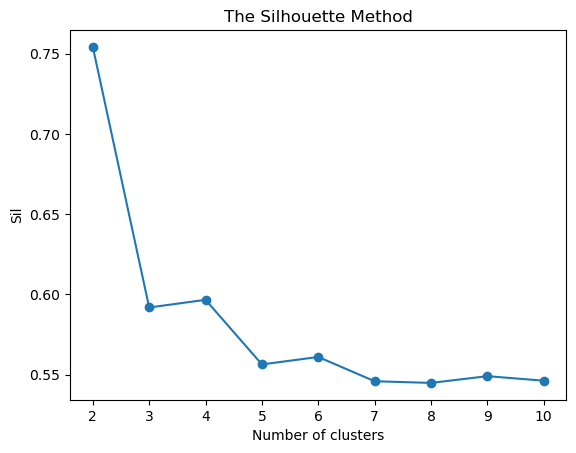

In [15]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(groups2)     # Assign here the name of the object we defined above. 
    labels = kmeans_s.labels_
    sil.append(silhouette_score(groups2,               # And here too.
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

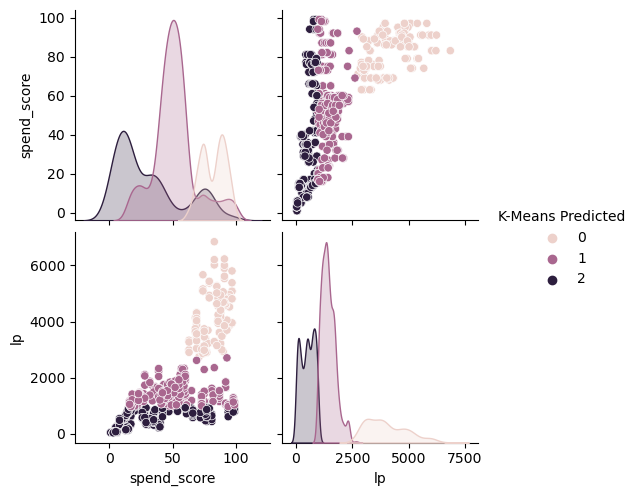

In [16]:
# We will use three clusters.
kmeans = KMeans(n_clusters = 3,
               max_iter = 15000,
               init='k-means++',
               random_state=42).fit(groups2)

clusters = kmeans.labels_
groups2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(groups2,
            hue='K-Means Predicted',
            diag_kind = 'kde')

plt.show()

<b> Conclusion: we are able to use K-means clustering to identify the engagers cluster, however the rest of the customer population is not so easy to segregate. Therefore, it would be best to proceed using manual assignment.

# Assigning categories to the customer population through visualisation

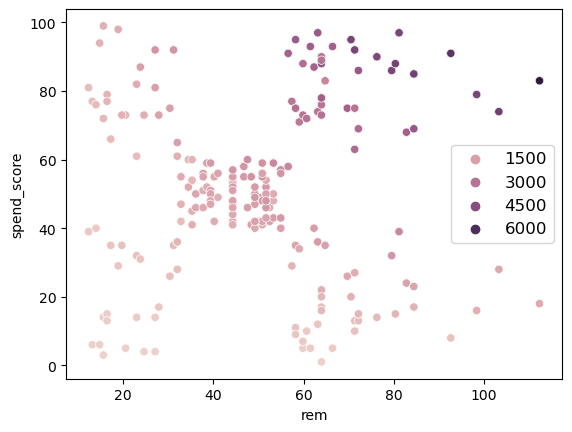

In [17]:
# We are still interested in loyalty point accumilation, so let's see how that occurs, overlaying gender and education.

# Create a scatterplot.
sns.scatterplot(x='rem', y='spend_score', data=data_groups, hue= 'lp')

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

<b> We see a nice transition from bottom left to top right! This ought not to be a surprise as we have already established that both rem and spend positivley affect lp. <b>
    
    Using the above, we can dictate the following logic for group assignment:
        
- if lp below 2000 and rem below 38 and spend below 45 then seed
- if lp below 2000 and rem below 38 and spend above 45 then non_engager 
- if lp below 2000 and rem above 38 and spend below 45 then non_engager 
- if lp above 2000 and rem above 55 and spend above 60 then engager
- else seed

In [18]:
# Create a new column and assign the categories.

conditions = [
    (data_groups['lp'] < 2000) & (data_groups['rem'] < 38) & (data_groups['spend_score'] < 45),
    (data_groups['lp'] < 2000) & (data_groups['rem'] < 38) & (data_groups['spend_score'] > 45),
    (data_groups['lp'] < 2000) & (data_groups['rem'] > 38) & (data_groups['spend_score'] < 45),
    (data_groups['lp'] > 2000) & (data_groups['rem'] > 55) & (data_groups['spend_score'] > 60)
]

choices = ['seed', 'non_engager', 'non_engager', 'engager']

data_groups['group'] = np.select(conditions, choices, default='seed')

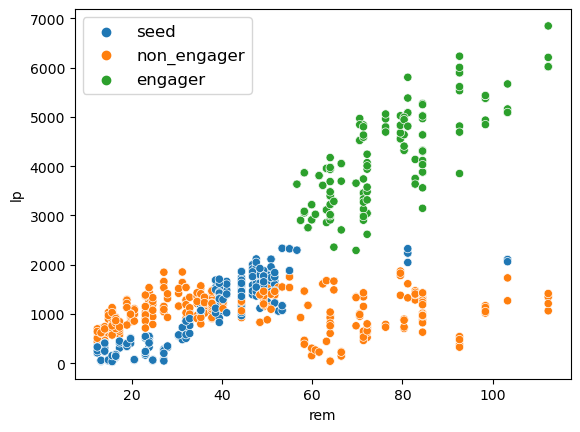

In [19]:
# Create a scatterplot.
sns.scatterplot(x='rem', y='lp', data=data_groups, hue= 'group')

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

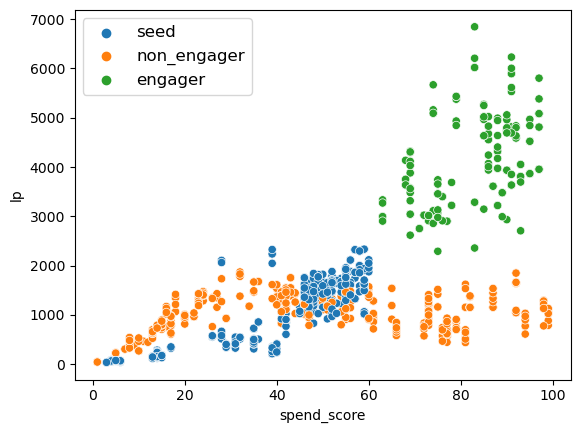

In [20]:
# Create a scatterplot.
sns.scatterplot(x='spend_score', y='lp', data=data_groups, hue= 'group')

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

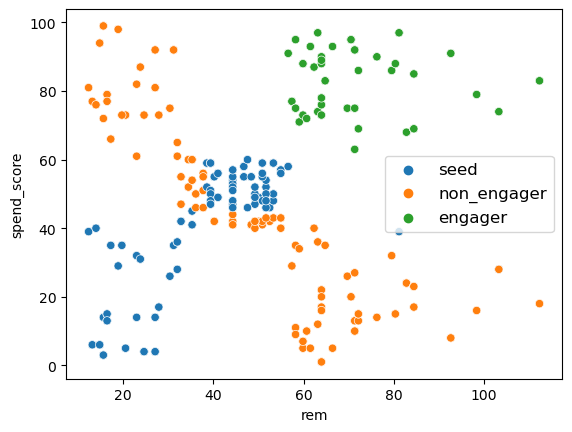

In [21]:
# Create a scatterplot.
sns.scatterplot(x='rem', y='spend_score', data=data_groups, hue= 'group')

# Set legend font size
plt.legend(fontsize='large')

# Show the plot.
plt.show()

In [22]:
print(data_groups['group'].value_counts())

data_groups.head()

group
non_engager    868
seed           776
engager        356
Name: count, dtype: int64


gender  age    rem  spend_score   lp education        group
0    Male   18  12.30           39  210  graduate         seed
1    Male   23  12.30           81  524  graduate  non_engager
2  Female   22  13.12            6   40  graduate         seed
3  Female   25  13.12           77  562  graduate  non_engager
4  Female   33  13.94           40  366  graduate         seed

<b> In conclusion:<b> we attempted to assign engagement categories to the customer data set by exploring K-means clustering. Failing that, we opted to 'manually' assign the labels.

# Building a BLR Model

<b> Considerations: <b>

There are several assumptions we must satisfy when building a BLR model and we must prepare the data in a certain way.

For example the dependent variable must be binary, with '1' representing the desired outcome (engagers).
The sample size ought to be quite large as well. With only 2000 rows overall and only 1224 (868+356) in the training data, the results of the model might be quite poor.

However the quality of the model will also be determined by the complexity of the problem, the relevence of the predictor variables (which we have already established above, is high) and the variability in the data. 
    
Therefore BLR may or may not yield accurate results. We will need to build it to find out.

# Setting up the data

In [23]:
# We established above that the categorical variables were strings without breaks. 
# We must now encode the education column due to the fact that the cateogries of education are ordinal.

# Let's just create a new DataFrame so that the original is not affected.
data_groups_BLR = data_groups.copy()

# Import the below relevant libraries.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the education column.
Edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
data_groups_BLR['education'] = data_groups_BLR['education'].apply(lambda x: x if x in Edu_order else 'other')
data_groups_BLR['education'] = le.transform(data_groups_BLR['education'])

# View the DataFrame
print(data_groups_BLR.head())

   gender  age    rem  spend_score   lp  education        group
0    Male   18  12.30           39  210          2         seed
1    Male   23  12.30           81  524          2  non_engager
2  Female   22  13.12            6   40          2         seed
3  Female   25  13.12           77  562          2  non_engager
4  Female   33  13.94           40  366          2         seed


In [24]:
# Let's just sense checke this with the below:

print(data_groups_BLR['education'].value_counts())
print("")
print(data_groups['education'].value_counts())

education
2    900
4    460
3    400
1    190
0     50
Name: count, dtype: int64

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64


In [25]:
# We also need to treat the gender column using one hot coding to split it out into a male and female column 
# with a binary value in each. For example a man would have '1' in the male column and '0' in the female column.

# Create dummy variables for 'gender' column.
gender_dummies = pd.get_dummies(data_groups_BLR['gender'], prefix='gender', drop_first = False)

# Join the new columns to the DataFrame.
data_groups_BLR = pd.concat([data_groups_BLR, gender_dummies.astype(int)], axis=1)

# Drop the original string columns
data_groups_BLR.drop(['gender'], axis=1, inplace=True)

# View the updated DataFrame
print(data_groups_BLR.head())

   age    rem  spend_score   lp  education        group  gender_Female  \
0   18  12.30           39  210          2         seed              0   
1   23  12.30           81  524          2  non_engager              0   
2   22  13.12            6   40          2         seed              1   
3   25  13.12           77  562          2  non_engager              1   
4   33  13.94           40  366          2         seed              1   

   gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [26]:
# Again, let's just sense checke this with the below:

print(data_groups_BLR['gender_Female'].value_counts())
print("")
print(data_groups_BLR['gender_Male'].value_counts())
print("")
print(data_groups['gender'].value_counts())

gender_Female
1    1120
0     880
Name: count, dtype: int64

gender_Male
0    1120
1     880
Name: count, dtype: int64

gender
Female    1120
Male       880
Name: count, dtype: int64


In [27]:
# Finally, we need our taget variable to be binary. Right now the target has three values and we are building a BLR model
# so this needs to be fixed. We will train the data on those who have engaged or not, not seeds.
# So lets remove the seeds for now.

# Create new DataFrames for moving forward.
data_groups_BLR_seeds = data_groups_BLR[data_groups_BLR['group']=='seed']

data_groups_BLR_engagers = data_groups_BLR[data_groups_BLR['group']!='seed']

In [28]:
# We then need to encode the 'group' column by setting 'engager' to '1' and 'non-engager' to '0'.
# We will use label encoding for this rather than one hot coding.
# We already created the required functions above and imported the required libraries.

# Order lists of the values for the engager column.
group_order = ['non_engager', 'engager']


# Fit the encoder with the ordered values.
le.fit(group_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
data_groups_BLR_engagers['group'] = data_groups_BLR_engagers['group'].apply(lambda x: x if x in group_order else 'other')
data_groups_BLR_engagers['group'] = le.transform(data_groups_BLR_engagers['group'])

# View the DataFrame
print(data_groups_BLR_engagers.head())

   age    rem  spend_score   lp  education  group  gender_Female  gender_Male
1   23  12.30           81  524          2      0              0            1
3   25  13.12           77  562          2      0              1            0
5   24  13.94           76  573          4      0              1            0
7   25  14.76           94  772          2      0              1            0
9   32  15.58           72  724          4      0              1            0


In [29]:
# As uaual, let's just sense checke this with the below:

print(data_groups_BLR_engagers['group'].value_counts())
print("")
print(data_groups_BLR['group'].value_counts())

group
0    868
1    356
Name: count, dtype: int64

group
non_engager    868
seed           776
engager        356
Name: count, dtype: int64


<b> We have successfully wrangled the data in order to begin building the model.

# Testing for multicollinearity

We should sense check for multicollinearity. We have done this above and didn't find any issue, however we have wrangled the data a fair bit since then so should do exercise dilligence.

In [76]:
# Set the variables.
X = data_groups_BLR_engagers.drop('group', axis = 1)
y = data_groups_BLR_engagers['group']

# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)

feature        VIF
4      education   1.027617
0            age   1.207417
1            rem   8.766590
2    spend_score  10.761047
3             lp  12.927193
6    gender_Male  49.018883
5  gender_Female  57.372876

Generally a VIF factor above 10 indicates a problem due to strong correlations. While it may be tempting to allow spend_score in, we should be guided by the standard of practice rather than the temptation that more parameters = better model.

The high VIF factor for gender is quite striking at first. Our analysis above indicated gender was fairly evenly distributed and not corolated with the other variables. However this is almost certainly due to the fact that gender has been split into two columns and therefore, negativley corrolate with one another! 

It is not a mistake that we got to this point, as having two columns gave us a VIF score for both. The gender_Male column has markedly less of a VIF hence we can justifyably keep this column and drop gender_Female. We do this without data loss, as the information contained in gender_Female is necessarily contained in gender_Male anyway.

In [77]:
# Drop gender_Female and repeat the above process.
# We could redefine the DataFrame, or just drop the column at the point of setting the variables. We will do the latter.

# Set the variables.
X = data_groups_BLR_engagers.drop(['group', 'gender_Female'], axis = 1)
y = data_groups_BLR_engagers['group']

# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)

feature        VIF
5  gender_Male   1.855849
4    education   7.183362
0          age   8.194678
2  spend_score  10.776172
3           lp  11.366534
1          rem  13.328671

As expected, gender has become the least corrolated variable. Let's proceed.

In [78]:
# Drop the columns with VIF > 10 to avoid multicollinearity problems.
# Let's try dropping only the worst offender.

X = X.drop(['lp', 'rem', 'spend_score'],
             axis = 1)

# View the DataFrame.
print(X.shape)
X.head()

(1224, 3)


age  education  gender_Male
1   23          2            1
3   25          2            0
5   24          4            0
7   25          2            0
9   32          4            0

In [79]:
# Recalculate VIF after removal of columns.
# VIF dataframe.
vif_data2 = pd.DataFrame()
vif_data2['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data2['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data2.sort_values('VIF',ascending=True)

feature       VIF
2  gender_Male  1.800152
1    education  4.547980
0          age  4.871595

The remaining variables all have a VIF below 5, which is excellent!

# Balancing the data

We need to balance the data before we can run the model. If we build the model on unbalanced data, it is more likely to make inaccurate predictions. We know from above that the data is not balanced, 868 non-engagers to 356 engagers.

<b> NOTE: <b> We need to install several libraries before we can proceed. If the below are already installed you do not need to run the next code block.

In [34]:
"""# Handles unbalanced data (scikit-learn needed)
!pip install imblearn  

# Optimised linear, algebra, integrations (scientific)
!pip install scipy  

# Simple tools for predictive data analytics
!pip install scikit-learn  

# Oversampling technique; creates new samples from data
!pip install SMOTE """

'# Handles unbalanced data (scikit-learn needed)\n!pip install imblearn  \n\n# Optimised linear, algebra, integrations (scientific)\n!pip install scipy  \n\n# Simple tools for predictive data analytics\n!pip install scikit-learn  \n\n# Oversampling technique; creates new samples from data\n!pip install SMOTE '

In [80]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['group'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   age  education  gender_Male
0   37          2            1
1   37          3            0
2   33          2            0
3   43          2            0
4   33          1            0


group
0      0
1      0
2      1
3      0
4      0

In [81]:
# Determine whether values in a column are balanced by counting the values.
os_data_y['group'].value_counts()

group
0    613
1    613
Name: count, dtype: int64

SMOTE has produced balanced variables. The number of engagers has increased due to the synthetic generation of values in this minority class.

# Test linearity

<b> We will test the linearity by plotting a continuous X variable, age, against our group target variable, and look for an S-shaped curve. This can be done with the following code using the Seaborn statistical plotting library for Python. (Hint: Generating the plot might take some time.)

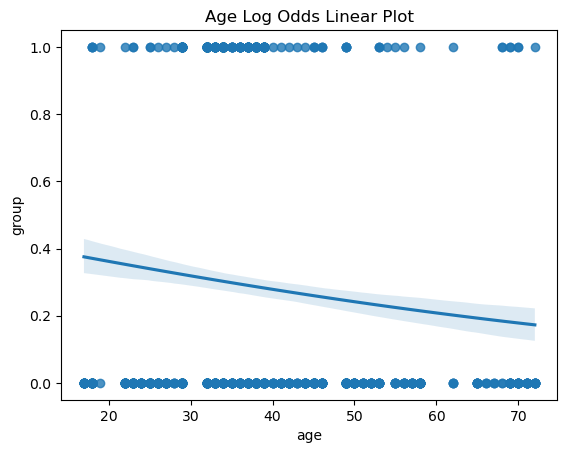

In [82]:
dur = sns.regplot(x = 'age',
                  y= 'group',
                  data= data_groups_BLR_engagers,
                  logistic= True).set_title("Age Log Odds Linear Plot")

This is not the shape of the curve we would expect, which does not bode well for the quality of the model. It suggests a more linear relationship between the variables.

# Fitting the model

In [83]:
# Name the new DataFrame, and specify all the columns for BLR.
nec_cols = os_data_X.columns

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['group']  

# Set the logit() to accept y and X as parameters, and return the logit object.
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.691286
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  group   No. Observations:                 1226
Model:                          Logit   Df Residuals:                     1223
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                0.002685
Time:                        19:36:59   Log-Likelihood:                -847.52
converged:                       True   LL-Null:                       -849.80
Covariance Type:            nonrobust   LLR p-value:                    0.1021
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0031      0.003      0.919      0.358      -0.004       0.010
education      -0.0651      0.046     -1.411      0.158      -0.155       0.025
gender_Male    -0.0972      0.114     -0.856      0.392      -0.320       0.125
===============================================================================
"""

In [84]:
# Import the necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set LogisticRegression() to logreg.
logreg = LogisticRegression(max_iter=1000) 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(os_data_X, os_data_y.values.ravel()) 

LogisticRegression(max_iter=1000)

In [85]:
# Determine BLR model's accuracy.
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(acc))

Accuracy of logistic regression classifier on test set: 0.58


<Axes: >

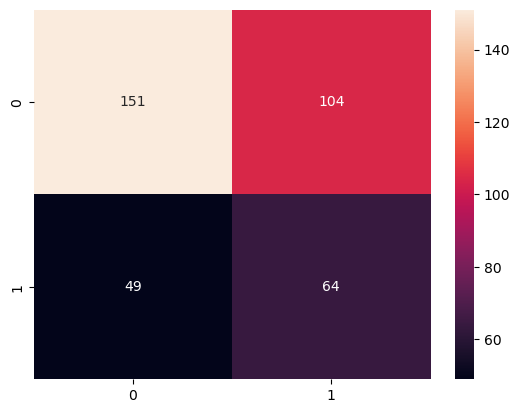

In [86]:
# Create the confusion matrix to test classification accuracy in BLR.
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [87]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_non_engager','observed_engager'],
columns=['predicted_non_engager', 'predicted_engager'])

predicted_non_engager  predicted_engager
observed_non_engager                    151                104
observed_engager                         49                 64

In [88]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.59      0.66       255
           1       0.38      0.57      0.46       113

    accuracy                           0.58       368
   macro avg       0.57      0.58      0.56       368
weighted avg       0.64      0.58      0.60       368



# Conclusions:

The model has an overall accuracy of 58% in identifying engagers from non-engagers. 
The model performs much better in predicting non-engagers compared to engagers, being correct about 76% of the time.
The F1 Score is useful here as it provides balance between precision and recall. A score of 0.66 for non-engagers is encouraging, meanwhile the F1 score for engagers is less than half.

Given the business case, we could say that we are able to indentify non-engagers with a decent level of accuracy and potentially intervene in their journey of non-engagement. The potential 'risks' associated with interrupting an engager are relatively low, assuming the message of interuption is tailored accordingly and any iincentive to engagement, cost effective. 

# Building A Decision Tree

<b> Let's look at building a decision tree to repeat the above process. 

# Setting up the data

In [90]:
# We will just begin by importing various libraries for the process. (Some we have already imported above.)

# Import all necessary libraries.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn import metrics

# Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm  

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [93]:
# We will return to the DataFrame we used above. 

data_groups_DT = data_groups.copy()

data_groups_DT

gender  age    rem  spend_score    lp education        group
0       Male   18  12.30           39   210  graduate         seed
1       Male   23  12.30           81   524  graduate  non_engager
2     Female   22  13.12            6    40  graduate         seed
3     Female   25  13.12           77   562  graduate  non_engager
4     Female   33  13.94           40   366  graduate         seed
...      ...  ...    ...          ...   ...       ...          ...
1995  Female   37  84.46           69  4031       PhD      engager
1996  Female   43  92.66            8   539       PhD  non_engager
1997    Male   34  92.66           91  5614  graduate      engager
1998    Male   34  98.40           16  1048       PhD  non_engager
1999    Male   32  92.66            8   479       PhD  non_engager

[2000 rows x 7 columns]

In [115]:
# Decision trees typically handle categorical variables by splitting them and encoding the columns. We will need to repeat
# this process, as our previous DataFrame applied ordinal values to the education column rather than splitting it.

# Removing the seeds.
data_groups_DT_engagers = data_groups_DT[data_groups_DT['group']!='seed']

# Encoding engagers/non-engagers.

# Order lists of the values for the engager column.
group_order = ['non_engager', 'engager']

# Fit the encoder with the ordered values.
le.fit(group_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
data_groups_DT_engagers['group'] = data_groups_DT_engagers['group'].apply(lambda x: x if x in group_order else 'other')
data_groups_DT_engagers['group'] = le.transform(data_groups_DT_engagers['group'])

# Encoding the gender column.

# Create dummy variables for 'gender' column.
gender_dummies = pd.get_dummies(data_groups_DT_engagers['gender'], prefix='gender', drop_first = True)

# Join the new columns to the DataFrame.
data_groups_DT_engagers = pd.concat([data_groups_DT_engagers, gender_dummies.astype(int)], axis=1)

# Drop the original string columns
data_groups_DT_engagers.drop(['gender'], axis=1, inplace=True)

# Examine the final DataFrame.

data_groups_DT_engagers.head()

age    rem  spend_score   lp education  group  gender_Male
1   23  12.30           81  524  graduate      0            1
3   25  13.12           77  562  graduate      0            0
5   24  13.94           76  573       PhD      0            0
7   25  14.76           94  772  graduate      0            0
9   32  15.58           72  724       PhD      0            0

In [116]:
# As uaual, let's just sense checke this with the below:

print(data_groups_DT_engagers['group'].value_counts())

group
0    868
1    356
Name: count, dtype: int64


In [117]:
# We now need to parse out the education column into several dummy columns.

# Name new DataFrame and convert categorical variables to dummy variables.
cat_vars= ['education']

# Use the for loop keyword to specify what actions to
# apply to all the 'var' items.
# Specify what needs to apply to all the variables.
for var in cat_vars:  
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(data_groups_DT_engagers[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    data_groups_DT_engagers = data_groups_DT_engagers.join(cat_list) 

data_groups_DT_engagers = data_groups_DT_engagers.drop(cat_vars, axis=1) 

# Set a temporary DataFrame and add values.
df_vars = data_groups_DT_engagers.columns.values.tolist()  

# Indicate what columns are kept.
to_keep = [i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
data_groups_DT_engagers = data_groups_DT_engagers[to_keep]  

# Print the column.
data_groups_DT_engagers.columns.values 

array(['age', 'rem', 'spend_score', 'lp', 'group', 'gender_Male',
       'education_Basic', 'education_PhD', 'education_diploma',
       'education_graduate', 'education_postgraduate'], dtype=object)

In [118]:
# View the DatFrame:

data_groups_DT_engagers.head()

age    rem  spend_score   lp  group  gender_Male  education_Basic  \
1   23  12.30           81  524      0            1            False   
3   25  13.12           77  562      0            0            False   
5   24  13.94           76  573      0            0            False   
7   25  14.76           94  772      0            0            False   
9   32  15.58           72  724      0            0            False   

   education_PhD  education_diploma  education_graduate  \
1          False              False                True   
3          False              False                True   
5           True              False               False   
7          False              False                True   
9           True              False               False   

   education_postgraduate  
1                   False  
3                   False  
5                   False  
7                   False  
9                   False

# Balance the data

In [120]:
# Select the colums we wish to include in the model.

X = data_groups_DT_engagers.drop('group', axis = 1)
y = data_groups_DT_engagers['group']

# Create a new DataFrame and apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y.
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['group'])

# Print/check the DataFrame.
print("Length of oversampled data is ",len(os_data_X))
os_data_y

Length of oversampled data is  1202


group
0         1
1         0
2         0
3         0
4         0
...     ...
1197      1
1198      1
1199      1
1200      1
1201      1

[1202 rows x 1 columns]

In [121]:
# Determine if values in a column are balanced.
os_data_y['group'].value_counts()  

group
1    601
0    601
Name: count, dtype: int64

# Building and fitting the decision tree

In [122]:
# Import scikit-learn metrics module for accuracy calculation.
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results.
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy: (TP + TN)/(TP + FP + TN + FN).
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision: TP/(TP + FP).
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall: TP/(FN + TP).
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[143 124]
 [ 57  44]]
Accuracy: 0.5081521739130435
Precision: 0.2619047619047619
Recall: 0.43564356435643564


<Axes: >

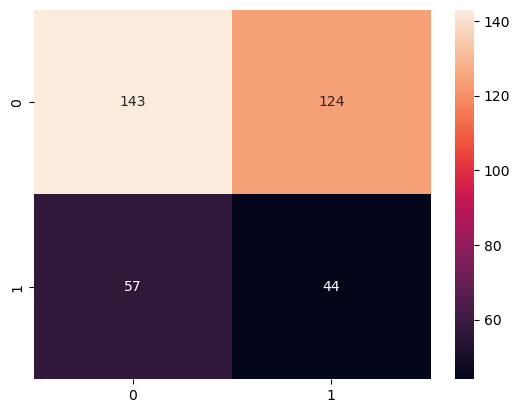

In [123]:
# Import Seaborn for visualisation.
import seaborn as sns

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [124]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

predicted_notchurn  predicted_churn
observed_notchurn                 143              124
observed_churn                     57               44

In [125]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       267
           1       0.26      0.44      0.33       101

    accuracy                           0.51       368
   macro avg       0.49      0.49      0.47       368
weighted avg       0.59      0.51      0.53       368

